# Importing Libraries

In [378]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Loading DataSet

In [226]:
df = pd.read_csv("train.csv")
df.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


# Data Feature Explanation

1. **Passenger Id:** and id given to each traveler on the boat
2. **Pclass:** the passenger class. It has three possible values: 1,2,3 (first, second and third class)
3. **Name:** The Name of the passenger
4. **Sex:** Gender of the passanger
5. **Age:** age of the passanger
6. **SibSp:** number of siblings and spouses traveling with the passenger
7. **Parch:** number of parents and children traveling with the passenger
8. **Ticket:** The ticket number
9. **Fare:** The ticket Fare
10. **Cabin:** The cabin number
11. **Embarked:** This describe three possible areas of the Titanic from which the people embark. Three possible values S,C,Q


# Exploratory Data Analysis and Feature Engineering

#### Printing Columns and shape

In [227]:
print(df.columns)
print(df.shape)
print("-----------")
print(pd.unique(df.Embarked))

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
(891, 12)
-----------
['S' 'C' 'Q' nan]


In [228]:
df.groupby("Embarked").count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
C,168,168,168,168,168,130,168,168,168,168,69
Q,77,77,77,77,77,28,77,77,77,77,4
S,644,644,644,644,644,554,644,644,644,644,129


In [229]:
df.Embarked = df.Embarked.fillna("S")

In [230]:
le = LabelEncoder()
sex = le.fit_transform(df.Sex)

In [231]:
df.Sex = sex

In [232]:
df = pd.concat([df, pd.get_dummies(df.Embarked)], axis = 1)

In [233]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658,-0.001205,-0.033606,0.022204
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.149683
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.074053
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,-0.082853,-0.074115,0.119224
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.036261,-0.022405,-0.023233
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.068734
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.060814
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.162184
C,-0.001205,0.168240,-0.243292,-0.082853,0.036261,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.782742
Q,-0.033606,0.003650,0.221009,-0.074115,-0.022405,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.499421


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
C              891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
dtypes: float64(2), int64(6), object(4), uint8(3)
memory usage: 86.2+ KB


In [ ]:
print(pd.unique(df.Cabin))

#### Removing columns
1. Chaning index to PassangerId
2. Removing columns -
    * Ticket
    * Name
    * PassangerId
    * Embarked
    * Cabin


In [235]:
df.index = df.PassengerId
df.drop(columns=["Ticket", "Name", "PassengerId", "Embarked", "Cabin"], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
PassengerId,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0,0,1
2,1,1,0,38.0,1,0,71.2833,1,0,0
3,1,3,0,26.0,0,0,7.9250,0,0,1
4,1,1,0,35.0,1,0,53.1000,0,0,1
5,0,3,1,35.0,0,0,8.0500,0,0,1


# Handeling Missing Data

In [246]:
nullAge = df[df.Age.isnull()]
notNullAge = df[df.Age.isnull() == False]
nullAge.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q',
       'S'],
      dtype='object')

In [247]:
X_nullAge = nullAge.loc[:, ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'C', 'Q', 'S']]
y_nullAge = nullAge.loc[:, 'Age']
X_notNullAge = notNullAge.loc[:, ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'C', 'Q', 'S']]
y_notNullAge = notNullAge.loc[:, 'Age']

In [248]:
X_train_notNullAge, X_test_notNullAge, y_train_notNullAge, y_test_notNullAge = train_test_split(X_notNullAge, 
                                                                                                y_notNullAge, 
                                                                                                test_size=0.25,
                                                                                                random_state=33)

In [309]:
depthToR2 = []
reg = RandomForestRegressor(n_estimators=estimator, max_depth=depth, random_state=33)
reg.fit(X_train_notNullAge, y_train_notNullAge)
for estimator in range (1, 1001):
    oldScore = -1
    Scorecounter = 0
    for depth in range(1,101):
        print("Estimator --> ", estimator, " Depth --> ", depth)
        y_pred_notNullAge = reg.predict(X_test_notNullAge)
        R2Score = r2_score(y_test_notNullAge, y_pred_notNullAge)
        depthToR2.append([estimator, depth, R2Score])
        print("Score --> ", R2Score, "\n")
        
        if oldScore <= R2Score:
            oldScore = R2Score
            Scorecounter = 0
        else:
            Scorecounter = Scorecounter+1
        if Scorecounter == 8:
            print("------------BREAKING-------------", "\n")
            break

Estimator -->  1  Depth -->  1
Score -->  0.0932327003512996 

Estimator -->  1  Depth -->  2
Score -->  0.21605797988813902 

Estimator -->  1  Depth -->  3
Score -->  0.2586741464447728 

Estimator -->  1  Depth -->  4
Score -->  0.2635312972076923 

Estimator -->  1  Depth -->  5
Score -->  0.2226533064410453 

Estimator -->  1  Depth -->  6
Score -->  0.25355373075710896 

Estimator -->  1  Depth -->  7
Score -->  0.08687621103021859 

Estimator -->  1  Depth -->  8
Score -->  0.09830028147049985 

Estimator -->  1  Depth -->  9
Score -->  0.11685514637196348 

Estimator -->  1  Depth -->  10
Score -->  0.12274946267080544 

Estimator -->  1  Depth -->  11
Score -->  0.1092309076028698 

Estimator -->  1  Depth -->  12
Score -->  0.1092309076028698 

------------BREAKING------------- 

Estimator -->  2  Depth -->  1
Score -->  0.17138103760349244 

Estimator -->  2  Depth -->  2
Score -->  0.28832945622698636 

Estimator -->  2  Depth -->  3
Score -->  0.3451461365121069 

Estimato

Score -->  0.35812988258910505 

------------BREAKING------------- 

Estimator -->  11  Depth -->  1
Score -->  0.18198868035150106 

Estimator -->  11  Depth -->  2
Score -->  0.3067382360600849 

Estimator -->  11  Depth -->  3
Score -->  0.3687585275590991 

Estimator -->  11  Depth -->  4
Score -->  0.38441014789474837 

Estimator -->  11  Depth -->  5
Score -->  0.3926279715140292 

Estimator -->  11  Depth -->  6
Score -->  0.39955895425231835 

Estimator -->  11  Depth -->  7
Score -->  0.3755527166571403 

Estimator -->  11  Depth -->  8
Score -->  0.37415498227825295 

Estimator -->  11  Depth -->  9
Score -->  0.3612751094654194 

Estimator -->  11  Depth -->  10
Score -->  0.36289554329789997 

Estimator -->  11  Depth -->  11
Score -->  0.3610485374449609 

Estimator -->  11  Depth -->  12
Score -->  0.36313176920877066 

Estimator -->  11  Depth -->  13
Score -->  0.360844734350274 

Estimator -->  11  Depth -->  14
Score -->  0.360844734350274 

------------BREAKING------

Score -->  0.3668523616671101 

Estimator -->  20  Depth -->  11
Score -->  0.36575303314431107 

Estimator -->  20  Depth -->  12
Score -->  0.36678620547421337 

Estimator -->  20  Depth -->  13
Score -->  0.36567798716415 

------------BREAKING------------- 

Estimator -->  21  Depth -->  1
Score -->  0.1821599782790393 

Estimator -->  21  Depth -->  2
Score -->  0.30739987610867514 

Estimator -->  21  Depth -->  3
Score -->  0.3589877678058815 

Estimator -->  21  Depth -->  4
Score -->  0.3805485900407427 

Estimator -->  21  Depth -->  5
Score -->  0.3965344503824887 

Estimator -->  21  Depth -->  6
Score -->  0.39590514147935685 

Estimator -->  21  Depth -->  7
Score -->  0.3811586752481343 

Estimator -->  21  Depth -->  8
Score -->  0.3788610123851459 

Estimator -->  21  Depth -->  9
Score -->  0.36615910355723547 

Estimator -->  21  Depth -->  10
Score -->  0.36635446980461517 

Estimator -->  21  Depth -->  11
Score -->  0.3654329754948883 

Estimator -->  21  Depth --

Score -->  0.3833020724405699 

Estimator -->  30  Depth -->  8
Score -->  0.3786808483336441 

Estimator -->  30  Depth -->  9
Score -->  0.36776358232864326 

Estimator -->  30  Depth -->  10
Score -->  0.36780019745900383 

Estimator -->  30  Depth -->  11
Score -->  0.3674696411921281 

Estimator -->  30  Depth -->  12
Score -->  0.367122964102893 

Estimator -->  30  Depth -->  13
Score -->  0.3666765466976889 

------------BREAKING------------- 

Estimator -->  31  Depth -->  1
Score -->  0.17835931459997212 

Estimator -->  31  Depth -->  2
Score -->  0.3077502565041046 

Estimator -->  31  Depth -->  3
Score -->  0.3579058633289409 

Estimator -->  31  Depth -->  4
Score -->  0.38238452580321936 

Estimator -->  31  Depth -->  5
Score -->  0.40170120828761346 

Estimator -->  31  Depth -->  6
Score -->  0.39671634670635203 

Estimator -->  31  Depth -->  7
Score -->  0.3806822444609985 

Estimator -->  31  Depth -->  8
Score -->  0.37724328440382093 

Estimator -->  31  Depth -

Score -->  0.37140777069990627 

------------BREAKING------------- 

Estimator -->  40  Depth -->  1
Score -->  0.17251439884126796 

Estimator -->  40  Depth -->  2
Score -->  0.30754005407293883 

Estimator -->  40  Depth -->  3
Score -->  0.35719312834668093 

Estimator -->  40  Depth -->  4
Score -->  0.3857609201261655 

Estimator -->  40  Depth -->  5
Score -->  0.4040151418436241 

Estimator -->  40  Depth -->  6
Score -->  0.3992925243286749 

Estimator -->  40  Depth -->  7
Score -->  0.3860090660776705 

Estimator -->  40  Depth -->  8
Score -->  0.3809620821241162 

Estimator -->  40  Depth -->  9
Score -->  0.3708847626354286 

Estimator -->  40  Depth -->  10
Score -->  0.3726557478320619 

Estimator -->  40  Depth -->  11
Score -->  0.37254265348873705 

Estimator -->  40  Depth -->  12
Score -->  0.37239579682253254 

Estimator -->  40  Depth -->  13
Score -->  0.37240218886187515 

------------BREAKING------------- 

Estimator -->  41  Depth -->  1
Score -->  0.17110600

Score -->  0.368478399012392 

Estimator -->  49  Depth -->  11
Score -->  0.3692426537179715 

Estimator -->  49  Depth -->  12
Score -->  0.36851638239713436 

Estimator -->  49  Depth -->  13
Score -->  0.3689837748738112 

------------BREAKING------------- 

Estimator -->  50  Depth -->  1
Score -->  0.16853150417220542 

Estimator -->  50  Depth -->  2
Score -->  0.3074537703142055 

Estimator -->  50  Depth -->  3
Score -->  0.3563692900531239 

Estimator -->  50  Depth -->  4
Score -->  0.38463245253991984 

Estimator -->  50  Depth -->  5
Score -->  0.4035802911205306 

Estimator -->  50  Depth -->  6
Score -->  0.4010141432641444 

Estimator -->  50  Depth -->  7
Score -->  0.3834759314591252 

Estimator -->  50  Depth -->  8
Score -->  0.37689467402296606 

Estimator -->  50  Depth -->  9
Score -->  0.36826297721083046 

Estimator -->  50  Depth -->  10
Score -->  0.36862028165749894 

Estimator -->  50  Depth -->  11
Score -->  0.369352809914574 

Estimator -->  50  Depth --

Score -->  0.40609461610972974 

Estimator -->  59  Depth -->  6
Score -->  0.4058324920759452 

Estimator -->  59  Depth -->  7
Score -->  0.38819157878573285 

Estimator -->  59  Depth -->  8
Score -->  0.3783410347816262 

Estimator -->  59  Depth -->  9
Score -->  0.3704621031815133 

Estimator -->  59  Depth -->  10
Score -->  0.37168603404495426 

Estimator -->  59  Depth -->  11
Score -->  0.3711056387912878 

Estimator -->  59  Depth -->  12
Score -->  0.3708987225437895 

Estimator -->  59  Depth -->  13
Score -->  0.3712061883965262 

------------BREAKING------------- 

Estimator -->  60  Depth -->  1
Score -->  0.17231362498185443 

Estimator -->  60  Depth -->  2
Score -->  0.30678474119190857 

Estimator -->  60  Depth -->  3
Score -->  0.3581103295737593 

Estimator -->  60  Depth -->  4
Score -->  0.38804728287937473 

Estimator -->  60  Depth -->  5
Score -->  0.40659352491390555 

Estimator -->  60  Depth -->  6
Score -->  0.4061621794627386 

Estimator -->  60  Depth 

Score -->  0.37970299048757084 

Estimator -->  68  Depth -->  9
Score -->  0.37354136625810697 

Estimator -->  68  Depth -->  10
Score -->  0.3743776557326698 

Estimator -->  68  Depth -->  11
Score -->  0.3742297093282676 

Estimator -->  68  Depth -->  12
Score -->  0.37408812208535813 

Estimator -->  68  Depth -->  13
Score -->  0.37437911848700944 

Estimator -->  68  Depth -->  14
Score -->  0.37437911848700944 

------------BREAKING------------- 

Estimator -->  69  Depth -->  1
Score -->  0.17446439433697936 

Estimator -->  69  Depth -->  2
Score -->  0.30587813536883635 

Estimator -->  69  Depth -->  3
Score -->  0.35677025990200495 

Estimator -->  69  Depth -->  4
Score -->  0.38614523120662847 

Estimator -->  69  Depth -->  5
Score -->  0.40468905685635026 

Estimator -->  69  Depth -->  6
Score -->  0.40480293258994693 

Estimator -->  69  Depth -->  7
Score -->  0.3890735030650808 

Estimator -->  69  Depth -->  8
Score -->  0.37890643800436874 

Estimator -->  69  

Score -->  0.3725614876517689 

------------BREAKING------------- 

Estimator -->  78  Depth -->  1
Score -->  0.1778304049611389 

Estimator -->  78  Depth -->  2
Score -->  0.30851873612681113 

Estimator -->  78  Depth -->  3
Score -->  0.3584504743864285 

Estimator -->  78  Depth -->  4
Score -->  0.3872775257876716 

Estimator -->  78  Depth -->  5
Score -->  0.40498166633460464 

Estimator -->  78  Depth -->  6
Score -->  0.4031726801534167 

Estimator -->  78  Depth -->  7
Score -->  0.3877670022866232 

Estimator -->  78  Depth -->  8
Score -->  0.3783123965496139 

Estimator -->  78  Depth -->  9
Score -->  0.3723736042852823 

Estimator -->  78  Depth -->  10
Score -->  0.37345431569709775 

Estimator -->  78  Depth -->  11
Score -->  0.3731145536585255 

Estimator -->  78  Depth -->  12
Score -->  0.3727033653651025 

Estimator -->  78  Depth -->  13
Score -->  0.3728501092175799 

------------BREAKING------------- 

Estimator -->  79  Depth -->  1
Score -->  0.177538655051

Score -->  0.4044006460750783 

Estimator -->  87  Depth -->  6
Score -->  0.4006310830775627 

Estimator -->  87  Depth -->  7
Score -->  0.3850304681171024 

Estimator -->  87  Depth -->  8
Score -->  0.3757501877875491 

Estimator -->  87  Depth -->  9
Score -->  0.3700951099297415 

Estimator -->  87  Depth -->  10
Score -->  0.37006398695244813 

Estimator -->  87  Depth -->  11
Score -->  0.36993535552730694 

Estimator -->  87  Depth -->  12
Score -->  0.3697591181491581 

Estimator -->  87  Depth -->  13
Score -->  0.3699247480050184 

------------BREAKING------------- 

Estimator -->  88  Depth -->  1
Score -->  0.17747995665528715 

Estimator -->  88  Depth -->  2
Score -->  0.31071453457001796 

Estimator -->  88  Depth -->  3
Score -->  0.3599825524022465 

Estimator -->  88  Depth -->  4
Score -->  0.387484926964457 

Estimator -->  88  Depth -->  5
Score -->  0.4044822638527934 

Estimator -->  88  Depth -->  6
Score -->  0.4013057677627242 

Estimator -->  88  Depth --> 

Score -->  0.3730385843499201 

------------BREAKING------------- 

Estimator -->  97  Depth -->  1
Score -->  0.1760928920487448 

Estimator -->  97  Depth -->  2
Score -->  0.31022322131983593 

Estimator -->  97  Depth -->  3
Score -->  0.35943932629031894 

Estimator -->  97  Depth -->  4
Score -->  0.38591974877953605 

Estimator -->  97  Depth -->  5
Score -->  0.40390609085456797 

Estimator -->  97  Depth -->  6
Score -->  0.40049702105339213 

Estimator -->  97  Depth -->  7
Score -->  0.38689423341096896 

Estimator -->  97  Depth -->  8
Score -->  0.3787194999513207 

Estimator -->  97  Depth -->  9
Score -->  0.3737385435528574 

Estimator -->  97  Depth -->  10
Score -->  0.3729297279923821 

Estimator -->  97  Depth -->  11
Score -->  0.37308238744936084 

Estimator -->  97  Depth -->  12
Score -->  0.3724321172169057 

Estimator -->  97  Depth -->  13
Score -->  0.372961848784391 

------------BREAKING------------- 

Estimator -->  98  Depth -->  1
Score -->  0.175925417

Score -->  0.38591370808537906 

Estimator -->  106  Depth -->  5
Score -->  0.4040700247917556 

Estimator -->  106  Depth -->  6
Score -->  0.4014190775496066 

Estimator -->  106  Depth -->  7
Score -->  0.38534259857462627 

Estimator -->  106  Depth -->  8
Score -->  0.3771610749158507 

Estimator -->  106  Depth -->  9
Score -->  0.3732295831724155 

Estimator -->  106  Depth -->  10
Score -->  0.37195719484757783 

Estimator -->  106  Depth -->  11
Score -->  0.3717549608220654 

Estimator -->  106  Depth -->  12
Score -->  0.37153400182261287 

Estimator -->  106  Depth -->  13
Score -->  0.37163678184703197 

------------BREAKING------------- 

Estimator -->  107  Depth -->  1
Score -->  0.17450293135381278 

Estimator -->  107  Depth -->  2
Score -->  0.3107610747961821 

Estimator -->  107  Depth -->  3
Score -->  0.36009171509699023 

Estimator -->  107  Depth -->  4
Score -->  0.3855000552765142 

Estimator -->  107  Depth -->  5
Score -->  0.40355776015077327 

Estimator 

Score -->  0.38497014402807295 

Estimator -->  115  Depth -->  8
Score -->  0.37713292084169914 

Estimator -->  115  Depth -->  9
Score -->  0.3729516901105423 

Estimator -->  115  Depth -->  10
Score -->  0.3712395434369584 

Estimator -->  115  Depth -->  11
Score -->  0.37071998971595643 

Estimator -->  115  Depth -->  12
Score -->  0.370796541952071 

Estimator -->  115  Depth -->  13
Score -->  0.370895373196648 

------------BREAKING------------- 

Estimator -->  116  Depth -->  1
Score -->  0.1787930418211362 

Estimator -->  116  Depth -->  2
Score -->  0.31130129748505675 

Estimator -->  116  Depth -->  3
Score -->  0.3607207458028694 

Estimator -->  116  Depth -->  4
Score -->  0.38642578122500404 

Estimator -->  116  Depth -->  5
Score -->  0.4051393644071125 

Estimator -->  116  Depth -->  6
Score -->  0.40174716847757597 

Estimator -->  116  Depth -->  7
Score -->  0.3847644359684732 

Estimator -->  116  Depth -->  8
Score -->  0.3771221056897992 

Estimator --> 

Score -->  0.37133559269972216 

Estimator -->  124  Depth -->  11
Score -->  0.37090415875785654 

Estimator -->  124  Depth -->  12
Score -->  0.37114859216544205 

Estimator -->  124  Depth -->  13
Score -->  0.3712547982544454 

------------BREAKING------------- 

Estimator -->  125  Depth -->  1
Score -->  0.17859845229234128 

Estimator -->  125  Depth -->  2
Score -->  0.3116839036882115 

Estimator -->  125  Depth -->  3
Score -->  0.36093480751251183 

Estimator -->  125  Depth -->  4
Score -->  0.3863910273951756 

Estimator -->  125  Depth -->  5
Score -->  0.40660549176888283 

Estimator -->  125  Depth -->  6
Score -->  0.40303506645672094 

Estimator -->  125  Depth -->  7
Score -->  0.3851276547397653 

Estimator -->  125  Depth -->  8
Score -->  0.3775533224855925 

Estimator -->  125  Depth -->  9
Score -->  0.37305385131285707 

Estimator -->  125  Depth -->  10
Score -->  0.37136493464847264 

Estimator -->  125  Depth -->  11
Score -->  0.370931950106136 

Estimator

Score -->  0.3709732561000314 

------------BREAKING------------- 

Estimator -->  134  Depth -->  1
Score -->  0.1795222471370993 

Estimator -->  134  Depth -->  2
Score -->  0.31185811414327913 

Estimator -->  134  Depth -->  3
Score -->  0.3617955066594676 

Estimator -->  134  Depth -->  4
Score -->  0.38727386160557786 

Estimator -->  134  Depth -->  5
Score -->  0.4069305638457359 

Estimator -->  134  Depth -->  6
Score -->  0.40280361190978675 

Estimator -->  134  Depth -->  7
Score -->  0.3853498190633289 

Estimator -->  134  Depth -->  8
Score -->  0.37800149051433507 

Estimator -->  134  Depth -->  9
Score -->  0.37320954155762887 

Estimator -->  134  Depth -->  10
Score -->  0.3710632537357442 

Estimator -->  134  Depth -->  11
Score -->  0.37039608381938294 

Estimator -->  134  Depth -->  12
Score -->  0.3705970027681852 

Estimator -->  134  Depth -->  13
Score -->  0.37070294343342636 

------------BREAKING------------- 

Estimator -->  135  Depth -->  1
Score -

Score -->  0.38805123779224027 

Estimator -->  143  Depth -->  5
Score -->  0.40580520047985935 

Estimator -->  143  Depth -->  6
Score -->  0.40207139533971126 

Estimator -->  143  Depth -->  7
Score -->  0.3846464879277519 

Estimator -->  143  Depth -->  8
Score -->  0.37694106643693015 

Estimator -->  143  Depth -->  9
Score -->  0.37243177974759123 

Estimator -->  143  Depth -->  10
Score -->  0.3700481718652606 

Estimator -->  143  Depth -->  11
Score -->  0.36904964644295346 

Estimator -->  143  Depth -->  12
Score -->  0.3694617436933818 

Estimator -->  143  Depth -->  13
Score -->  0.36917702185772794 

------------BREAKING------------- 

Estimator -->  144  Depth -->  1
Score -->  0.17791863837362376 

Estimator -->  144  Depth -->  2
Score -->  0.3109291677680549 

Estimator -->  144  Depth -->  3
Score -->  0.3612169607320995 

Estimator -->  144  Depth -->  4
Score -->  0.38797443342680393 

Estimator -->  144  Depth -->  5
Score -->  0.40578183620447184 

Estimato

Score -->  0.3842339335345958 

Estimator -->  152  Depth -->  8
Score -->  0.3756057225114281 

Estimator -->  152  Depth -->  9
Score -->  0.370818566597538 

Estimator -->  152  Depth -->  10
Score -->  0.36828925895688647 

Estimator -->  152  Depth -->  11
Score -->  0.36737729077588743 

Estimator -->  152  Depth -->  12
Score -->  0.36793200125684167 

Estimator -->  152  Depth -->  13
Score -->  0.36760287199415986 

------------BREAKING------------- 

Estimator -->  153  Depth -->  1
Score -->  0.17686511298154228 

Estimator -->  153  Depth -->  2
Score -->  0.3111908192059748 

Estimator -->  153  Depth -->  3
Score -->  0.36122946512366894 

Estimator -->  153  Depth -->  4
Score -->  0.3872759694976676 

Estimator -->  153  Depth -->  5
Score -->  0.40478265548588976 

Estimator -->  153  Depth -->  6
Score -->  0.4009096917557451 

Estimator -->  153  Depth -->  7
Score -->  0.38408971675531023 

Estimator -->  153  Depth -->  8
Score -->  0.37542533505103615 

Estimator 

Score -->  0.3680618189977174 

Estimator -->  161  Depth -->  12
Score -->  0.3685550866866495 

Estimator -->  161  Depth -->  13
Score -->  0.36837870310520626 

------------BREAKING------------- 

Estimator -->  162  Depth -->  1
Score -->  0.17856817702700722 

Estimator -->  162  Depth -->  2
Score -->  0.3111918312602344 

Estimator -->  162  Depth -->  3
Score -->  0.3606207009033179 

Estimator -->  162  Depth -->  4
Score -->  0.3877038919997904 

Estimator -->  162  Depth -->  5
Score -->  0.4052440482526316 

Estimator -->  162  Depth -->  6
Score -->  0.4025707939876315 

Estimator -->  162  Depth -->  7
Score -->  0.3861678520401076 

Estimator -->  162  Depth -->  8
Score -->  0.3770792923575438 

Estimator -->  162  Depth -->  9
Score -->  0.3719069413331515 

Estimator -->  162  Depth -->  10
Score -->  0.3697425534159363 

Estimator -->  162  Depth -->  11
Score -->  0.36869486070956503 

Estimator -->  162  Depth -->  12
Score -->  0.3691834935065561 

Estimator --> 

Score -->  0.3107549577599924 

Estimator -->  171  Depth -->  3
Score -->  0.36049181802136865 

Estimator -->  171  Depth -->  4
Score -->  0.3870174963675521 

Estimator -->  171  Depth -->  5
Score -->  0.40537532445279134 

Estimator -->  171  Depth -->  6
Score -->  0.40315589359224746 

Estimator -->  171  Depth -->  7
Score -->  0.3871614460684347 

Estimator -->  171  Depth -->  8
Score -->  0.3783704962031281 

Estimator -->  171  Depth -->  9
Score -->  0.3731402684983608 

Estimator -->  171  Depth -->  10
Score -->  0.3709397503663908 

Estimator -->  171  Depth -->  11
Score -->  0.3698797346597824 

Estimator -->  171  Depth -->  12
Score -->  0.37033304533009637 

Estimator -->  171  Depth -->  13
Score -->  0.37017610798354017 

------------BREAKING------------- 

Estimator -->  172  Depth -->  1
Score -->  0.179048078331021 

Estimator -->  172  Depth -->  2
Score -->  0.31099831545064793 

Estimator -->  172  Depth -->  3
Score -->  0.36075687184259275 

Estimator --

Score -->  0.4063172934742374 

Estimator -->  180  Depth -->  6
Score -->  0.4037551937092657 

Estimator -->  180  Depth -->  7
Score -->  0.3877720915705951 

Estimator -->  180  Depth -->  8
Score -->  0.37884346685441317 

Estimator -->  180  Depth -->  9
Score -->  0.37265890500529397 

Estimator -->  180  Depth -->  10
Score -->  0.3703118208780011 

Estimator -->  180  Depth -->  11
Score -->  0.3691366672907189 

Estimator -->  180  Depth -->  12
Score -->  0.36956868701016077 

Estimator -->  180  Depth -->  13
Score -->  0.3694406157561697 

------------BREAKING------------- 

Estimator -->  181  Depth -->  1
Score -->  0.17899375980666088 

Estimator -->  181  Depth -->  2
Score -->  0.31073623029188 

Estimator -->  181  Depth -->  3
Score -->  0.36143046685749636 

Estimator -->  181  Depth -->  4
Score -->  0.3878799262378986 

Estimator -->  181  Depth -->  5
Score -->  0.4064801215983701 

Estimator -->  181  Depth -->  6
Score -->  0.403582819890303 

Estimator -->  1

Score -->  0.3786259905410533 

Estimator -->  189  Depth -->  9
Score -->  0.3726256988259614 

Estimator -->  189  Depth -->  10
Score -->  0.3699869123697914 

Estimator -->  189  Depth -->  11
Score -->  0.3689554299253849 

Estimator -->  189  Depth -->  12
Score -->  0.3693282029982812 

Estimator -->  189  Depth -->  13
Score -->  0.3691967429207189 

------------BREAKING------------- 

Estimator -->  190  Depth -->  1
Score -->  0.17832751801221647 

Estimator -->  190  Depth -->  2
Score -->  0.3104486586714491 

Estimator -->  190  Depth -->  3
Score -->  0.3614301690363836 

Estimator -->  190  Depth -->  4
Score -->  0.38751830882650395 

Estimator -->  190  Depth -->  5
Score -->  0.40674934754046743 

Estimator -->  190  Depth -->  6
Score -->  0.40357022577462043 

Estimator -->  190  Depth -->  7
Score -->  0.3880465663641598 

Estimator -->  190  Depth -->  8
Score -->  0.37876359064415277 

Estimator -->  190  Depth -->  9
Score -->  0.37284117384213045 

Estimator --

Score -->  0.36865633954294497 

Estimator -->  198  Depth -->  13
Score -->  0.3686349340243159 

------------BREAKING------------- 

Estimator -->  199  Depth -->  1
Score -->  0.17943872136058336 

Estimator -->  199  Depth -->  2
Score -->  0.3107664389912549 

Estimator -->  199  Depth -->  3
Score -->  0.3616916344784037 

Estimator -->  199  Depth -->  4
Score -->  0.387437949297577 

Estimator -->  199  Depth -->  5
Score -->  0.4065588332079334 

Estimator -->  199  Depth -->  6
Score -->  0.40357179115692887 

Estimator -->  199  Depth -->  7
Score -->  0.3881358462565043 

Estimator -->  199  Depth -->  8
Score -->  0.3783258718675898 

Estimator -->  199  Depth -->  9
Score -->  0.3722014080883813 

Estimator -->  199  Depth -->  10
Score -->  0.36947520367478026 

Estimator -->  199  Depth -->  11
Score -->  0.3686043371918687 

Estimator -->  199  Depth -->  12
Score -->  0.368721582478856 

Estimator -->  199  Depth -->  13
Score -->  0.3686987893831736 

------------BRE

Score -->  0.3878099412679974 

Estimator -->  208  Depth -->  5
Score -->  0.4064657899437466 

Estimator -->  208  Depth -->  6
Score -->  0.4039431320591379 

Estimator -->  208  Depth -->  7
Score -->  0.3886971795547518 

Estimator -->  208  Depth -->  8
Score -->  0.3786176697969499 

Estimator -->  208  Depth -->  9
Score -->  0.37286468720274213 

Estimator -->  208  Depth -->  10
Score -->  0.3701152549572416 

Estimator -->  208  Depth -->  11
Score -->  0.3693432024271366 

Estimator -->  208  Depth -->  12
Score -->  0.3693593453257453 

Estimator -->  208  Depth -->  13
Score -->  0.3693114022995987 

------------BREAKING------------- 

Estimator -->  209  Depth -->  1
Score -->  0.17933423362039946 

Estimator -->  209  Depth -->  2
Score -->  0.31086292147930283 

Estimator -->  209  Depth -->  3
Score -->  0.3618520038573202 

Estimator -->  209  Depth -->  4
Score -->  0.38774742592053413 

Estimator -->  209  Depth -->  5
Score -->  0.4063577027415086 

Estimator --> 

Score -->  0.3905712749928796 

Estimator -->  217  Depth -->  8
Score -->  0.3798991970724034 

Estimator -->  217  Depth -->  9
Score -->  0.37431811094828016 

Estimator -->  217  Depth -->  10
Score -->  0.37159563251896444 

Estimator -->  217  Depth -->  11
Score -->  0.3709256268601159 

Estimator -->  217  Depth -->  12
Score -->  0.37087242704470635 

Estimator -->  217  Depth -->  13
Score -->  0.37080366119959984 

------------BREAKING------------- 

Estimator -->  218  Depth -->  1
Score -->  0.1795733605547727 

Estimator -->  218  Depth -->  2
Score -->  0.31083087332534676 

Estimator -->  218  Depth -->  3
Score -->  0.3620847551734059 

Estimator -->  218  Depth -->  4
Score -->  0.3878324455308253 

Estimator -->  218  Depth -->  5
Score -->  0.4068385205129398 

Estimator -->  218  Depth -->  6
Score -->  0.40453993398383725 

Estimator -->  218  Depth -->  7
Score -->  0.3903706142065768 

Estimator -->  218  Depth -->  8
Score -->  0.3797287975303615 

Estimator --

Score -->  0.37106042005138296 

Estimator -->  226  Depth -->  12
Score -->  0.37095744049007395 

Estimator -->  226  Depth -->  13
Score -->  0.37091343373876984 

------------BREAKING------------- 

Estimator -->  227  Depth -->  1
Score -->  0.1804616341343548 

Estimator -->  227  Depth -->  2
Score -->  0.3104515346881397 

Estimator -->  227  Depth -->  3
Score -->  0.3617251800545743 

Estimator -->  227  Depth -->  4
Score -->  0.3874703993819387 

Estimator -->  227  Depth -->  5
Score -->  0.40736981897246305 

Estimator -->  227  Depth -->  6
Score -->  0.40521037443441854 

Estimator -->  227  Depth -->  7
Score -->  0.39049273327064904 

Estimator -->  227  Depth -->  8
Score -->  0.379903239679236 

Estimator -->  227  Depth -->  9
Score -->  0.3746214327739388 

Estimator -->  227  Depth -->  10
Score -->  0.3720652303791221 

Estimator -->  227  Depth -->  11
Score -->  0.371545117595257 

Estimator -->  227  Depth -->  12
Score -->  0.3714415861433692 

Estimator -->

Score -->  0.3111492026936046 

Estimator -->  236  Depth -->  3
Score -->  0.3623819126053437 

Estimator -->  236  Depth -->  4
Score -->  0.38790865185381407 

Estimator -->  236  Depth -->  5
Score -->  0.4072417043629951 

Estimator -->  236  Depth -->  6
Score -->  0.4047973490395883 

Estimator -->  236  Depth -->  7
Score -->  0.39029927275758125 

Estimator -->  236  Depth -->  8
Score -->  0.38016074648195286 

Estimator -->  236  Depth -->  9
Score -->  0.3747825708861996 

Estimator -->  236  Depth -->  10
Score -->  0.37228545393193524 

Estimator -->  236  Depth -->  11
Score -->  0.37190124238525124 

Estimator -->  236  Depth -->  12
Score -->  0.3717986119053276 

Estimator -->  236  Depth -->  13
Score -->  0.37175053956515614 

------------BREAKING------------- 

Estimator -->  237  Depth -->  1
Score -->  0.18148680784623505 

Estimator -->  237  Depth -->  2
Score -->  0.3111537018943673 

Estimator -->  237  Depth -->  3
Score -->  0.3621034592957477 

Estimator -

Score -->  0.4063023048722185 

Estimator -->  245  Depth -->  6
Score -->  0.4042689718379763 

Estimator -->  245  Depth -->  7
Score -->  0.38997753818142167 

Estimator -->  245  Depth -->  8
Score -->  0.37964060569584535 

Estimator -->  245  Depth -->  9
Score -->  0.3739437854740475 

Estimator -->  245  Depth -->  10
Score -->  0.37183709749920557 

Estimator -->  245  Depth -->  11
Score -->  0.3713998225681727 

Estimator -->  245  Depth -->  12
Score -->  0.37136013694922376 

Estimator -->  245  Depth -->  13
Score -->  0.37137758429450873 

------------BREAKING------------- 

Estimator -->  246  Depth -->  1
Score -->  0.18129613482055895 

Estimator -->  246  Depth -->  2
Score -->  0.310824311829914 

Estimator -->  246  Depth -->  3
Score -->  0.3617682591027077 

Estimator -->  246  Depth -->  4
Score -->  0.38664321582296535 

Estimator -->  246  Depth -->  5
Score -->  0.40609144718830226 

Estimator -->  246  Depth -->  6
Score -->  0.4040270411899153 

Estimator -

Score -->  0.37954512959176323 

Estimator -->  254  Depth -->  9
Score -->  0.37357735473446785 

Estimator -->  254  Depth -->  10
Score -->  0.37150363509311657 

Estimator -->  254  Depth -->  11
Score -->  0.37131213068500035 

Estimator -->  254  Depth -->  12
Score -->  0.3712145859708954 

Estimator -->  254  Depth -->  13
Score -->  0.3712391089900754 

------------BREAKING------------- 

Estimator -->  255  Depth -->  1
Score -->  0.18116387996650363 

Estimator -->  255  Depth -->  2
Score -->  0.3105101246388037 

Estimator -->  255  Depth -->  3
Score -->  0.3611635501552992 

Estimator -->  255  Depth -->  4
Score -->  0.3856754572540314 

Estimator -->  255  Depth -->  5
Score -->  0.4056623698445928 

Estimator -->  255  Depth -->  6
Score -->  0.40322571843307287 

Estimator -->  255  Depth -->  7
Score -->  0.389056657710689 

Estimator -->  255  Depth -->  8
Score -->  0.379072775017657 

Estimator -->  255  Depth -->  9
Score -->  0.37308655168969673 

Estimator -->

Score -->  0.37136476439436394 

Estimator -->  263  Depth -->  12
Score -->  0.37144779972487363 

Estimator -->  263  Depth -->  13
Score -->  0.3714648014300257 

------------BREAKING------------- 

Estimator -->  264  Depth -->  1
Score -->  0.18154463699079593 

Estimator -->  264  Depth -->  2
Score -->  0.31089195754271737 

Estimator -->  264  Depth -->  3
Score -->  0.3614815399994634 

Estimator -->  264  Depth -->  4
Score -->  0.38595926262788127 

Estimator -->  264  Depth -->  5
Score -->  0.40616109484654883 

Estimator -->  264  Depth -->  6
Score -->  0.4037470986280173 

Estimator -->  264  Depth -->  7
Score -->  0.3894598182357356 

Estimator -->  264  Depth -->  8
Score -->  0.3792671524002895 

Estimator -->  264  Depth -->  9
Score -->  0.3735331849971022 

Estimator -->  264  Depth -->  10
Score -->  0.3712650879507249 

Estimator -->  264  Depth -->  11
Score -->  0.3711519498107334 

Estimator -->  264  Depth -->  12
Score -->  0.37117483680610996 

Estimator 

Score -->  0.181789113312122 

Estimator -->  273  Depth -->  2
Score -->  0.3106565579898737 

Estimator -->  273  Depth -->  3
Score -->  0.36092390798002394 

Estimator -->  273  Depth -->  4
Score -->  0.3860516098653485 

Estimator -->  273  Depth -->  5
Score -->  0.40604145920345003 

Estimator -->  273  Depth -->  6
Score -->  0.4037310834549571 

Estimator -->  273  Depth -->  7
Score -->  0.38936161233897193 

Estimator -->  273  Depth -->  8
Score -->  0.379389636196652 

Estimator -->  273  Depth -->  9
Score -->  0.37344522887860754 

Estimator -->  273  Depth -->  10
Score -->  0.3714220498507911 

Estimator -->  273  Depth -->  11
Score -->  0.37122115760467767 

Estimator -->  273  Depth -->  12
Score -->  0.3712350098984625 

Estimator -->  273  Depth -->  13
Score -->  0.37122631783382976 

------------BREAKING------------- 

Estimator -->  274  Depth -->  1
Score -->  0.18169724784477304 

Estimator -->  274  Depth -->  2
Score -->  0.31078379942787226 

Estimator --

Score -->  0.38614388404689926 

Estimator -->  282  Depth -->  5
Score -->  0.4057426394851724 

Estimator -->  282  Depth -->  6
Score -->  0.4033257196901223 

Estimator -->  282  Depth -->  7
Score -->  0.38929049157284745 

Estimator -->  282  Depth -->  8
Score -->  0.37911153149448373 

Estimator -->  282  Depth -->  9
Score -->  0.3734904072956653 

Estimator -->  282  Depth -->  10
Score -->  0.37168265492115726 

Estimator -->  282  Depth -->  11
Score -->  0.37153883355601336 

Estimator -->  282  Depth -->  12
Score -->  0.37144984027093597 

Estimator -->  282  Depth -->  13
Score -->  0.3714446386033827 

------------BREAKING------------- 

Estimator -->  283  Depth -->  1
Score -->  0.18160603892487215 

Estimator -->  283  Depth -->  2
Score -->  0.31036346292216 

Estimator -->  283  Depth -->  3
Score -->  0.3608929974442583 

Estimator -->  283  Depth -->  4
Score -->  0.3861384417691015 

Estimator -->  283  Depth -->  5
Score -->  0.4055498850786099 

Estimator -->

Score -->  0.37902487535064955 

Estimator -->  291  Depth -->  9
Score -->  0.37304638699384773 

Estimator -->  291  Depth -->  10
Score -->  0.3712809260271447 

Estimator -->  291  Depth -->  11
Score -->  0.37118766624944677 

Estimator -->  291  Depth -->  12
Score -->  0.3709985941248328 

Estimator -->  291  Depth -->  13
Score -->  0.3709921115813921 

------------BREAKING------------- 

Estimator -->  292  Depth -->  1
Score -->  0.18114939450178436 

Estimator -->  292  Depth -->  2
Score -->  0.3099378463858212 

Estimator -->  292  Depth -->  3
Score -->  0.3603378911974717 

Estimator -->  292  Depth -->  4
Score -->  0.3857586909962232 

Estimator -->  292  Depth -->  5
Score -->  0.4057648859435339 

Estimator -->  292  Depth -->  6
Score -->  0.4038235980630366 

Estimator -->  292  Depth -->  7
Score -->  0.38982239085369097 

Estimator -->  292  Depth -->  8
Score -->  0.37914217564908126 

Estimator -->  292  Depth -->  9
Score -->  0.3733114343982157 

Estimator --

Score -->  0.3712446611389113 

Estimator -->  300  Depth -->  12
Score -->  0.3711038584684466 

Estimator -->  300  Depth -->  13
Score -->  0.37114672890184397 

------------BREAKING------------- 

Estimator -->  301  Depth -->  1
Score -->  0.1807670072632941 

Estimator -->  301  Depth -->  2
Score -->  0.30977549119639114 

Estimator -->  301  Depth -->  3
Score -->  0.3601454437659789 

Estimator -->  301  Depth -->  4
Score -->  0.3853913933682407 

Estimator -->  301  Depth -->  5
Score -->  0.4058819325690407 

Estimator -->  301  Depth -->  6
Score -->  0.40375820721747946 

Estimator -->  301  Depth -->  7
Score -->  0.38958539383456614 

Estimator -->  301  Depth -->  8
Score -->  0.37895820687307 

Estimator -->  301  Depth -->  9
Score -->  0.37295782665762833 

Estimator -->  301  Depth -->  10
Score -->  0.37126237988615063 

Estimator -->  301  Depth -->  11
Score -->  0.3710819578384763 

Estimator -->  301  Depth -->  12
Score -->  0.37094219395520456 

Estimator --

Score -->  0.31030551032164533 

Estimator -->  310  Depth -->  3
Score -->  0.3606013524479825 

Estimator -->  310  Depth -->  4
Score -->  0.385874184762938 

Estimator -->  310  Depth -->  5
Score -->  0.4064274435375739 

Estimator -->  310  Depth -->  6
Score -->  0.40395110201811435 

Estimator -->  310  Depth -->  7
Score -->  0.3896620766574884 

Estimator -->  310  Depth -->  8
Score -->  0.3790754914562363 

Estimator -->  310  Depth -->  9
Score -->  0.37320955186573834 

Estimator -->  310  Depth -->  10
Score -->  0.37162211376880794 

Estimator -->  310  Depth -->  11
Score -->  0.37135314927074614 

Estimator -->  310  Depth -->  12
Score -->  0.371190542104366 

Estimator -->  310  Depth -->  13
Score -->  0.3712475087365734 

------------BREAKING------------- 

Estimator -->  311  Depth -->  1
Score -->  0.18089851633706544 

Estimator -->  311  Depth -->  2
Score -->  0.31041999891724004 

Estimator -->  311  Depth -->  3
Score -->  0.3606909645602906 

Estimator -->

Score -->  0.4041304844938678 

Estimator -->  319  Depth -->  7
Score -->  0.3900704147968159 

Estimator -->  319  Depth -->  8
Score -->  0.37961960540185435 

Estimator -->  319  Depth -->  9
Score -->  0.3739464133258391 

Estimator -->  319  Depth -->  10
Score -->  0.3724171268343571 

Estimator -->  319  Depth -->  11
Score -->  0.3721664778455308 

Estimator -->  319  Depth -->  12
Score -->  0.3719947523935837 

Estimator -->  319  Depth -->  13
Score -->  0.37205378962456326 

------------BREAKING------------- 

Estimator -->  320  Depth -->  1
Score -->  0.1808544383519911 

Estimator -->  320  Depth -->  2
Score -->  0.31091675231373506 

Estimator -->  320  Depth -->  3
Score -->  0.36101036502469364 

Estimator -->  320  Depth -->  4
Score -->  0.38571642804195483 

Estimator -->  320  Depth -->  5
Score -->  0.4062754976528803 

Estimator -->  320  Depth -->  6
Score -->  0.4040686509259471 

Estimator -->  320  Depth -->  7
Score -->  0.3899969982183872 

Estimator -->

Score -->  0.37312928149619795 

Estimator -->  328  Depth -->  10
Score -->  0.37163579482134657 

Estimator -->  328  Depth -->  11
Score -->  0.37150970363877267 

Estimator -->  328  Depth -->  12
Score -->  0.3712831834001368 

Estimator -->  328  Depth -->  13
Score -->  0.37136496987092693 

------------BREAKING------------- 

Estimator -->  329  Depth -->  1
Score -->  0.18166029121555805 

Estimator -->  329  Depth -->  2
Score -->  0.31039130134505233 

Estimator -->  329  Depth -->  3
Score -->  0.3608059388900464 

Estimator -->  329  Depth -->  4
Score -->  0.38561187351731807 

Estimator -->  329  Depth -->  5
Score -->  0.40587521386949343 

Estimator -->  329  Depth -->  6
Score -->  0.4031230369915828 

Estimator -->  329  Depth -->  7
Score -->  0.3895290163492734 

Estimator -->  329  Depth -->  8
Score -->  0.3786622699307023 

Estimator -->  329  Depth -->  9
Score -->  0.3731584377834696 

Estimator -->  329  Depth -->  10
Score -->  0.37167331335234144 

Estimato

Score -->  0.37114045102189597 

Estimator -->  337  Depth -->  13
Score -->  0.37119792399086693 

------------BREAKING------------- 

Estimator -->  338  Depth -->  1
Score -->  0.18101189750076485 

Estimator -->  338  Depth -->  2
Score -->  0.3104738671279095 

Estimator -->  338  Depth -->  3
Score -->  0.36032601618340043 

Estimator -->  338  Depth -->  4
Score -->  0.38518102070410776 

Estimator -->  338  Depth -->  5
Score -->  0.4053971451429452 

Estimator -->  338  Depth -->  6
Score -->  0.4022308934552503 

Estimator -->  338  Depth -->  7
Score -->  0.38926073731463084 

Estimator -->  338  Depth -->  8
Score -->  0.37826723582190325 

Estimator -->  338  Depth -->  9
Score -->  0.3725144646302948 

Estimator -->  338  Depth -->  10
Score -->  0.37094891101697425 

Estimator -->  338  Depth -->  11
Score -->  0.37095562720157294 

Estimator -->  338  Depth -->  12
Score -->  0.3707501371434283 

Estimator -->  338  Depth -->  13
Score -->  0.3708075462432129 

--------

Score -->  0.3104228823967734 

Estimator -->  347  Depth -->  3
Score -->  0.3604130611365163 

Estimator -->  347  Depth -->  4
Score -->  0.385308298109413 

Estimator -->  347  Depth -->  5
Score -->  0.4058376656207635 

Estimator -->  347  Depth -->  6
Score -->  0.4023015037602068 

Estimator -->  347  Depth -->  7
Score -->  0.3896568303374395 

Estimator -->  347  Depth -->  8
Score -->  0.3788464273449279 

Estimator -->  347  Depth -->  9
Score -->  0.3731013244938304 

Estimator -->  347  Depth -->  10
Score -->  0.37145659262238206 

Estimator -->  347  Depth -->  11
Score -->  0.3714792031787749 

Estimator -->  347  Depth -->  12
Score -->  0.37132881279987984 

Estimator -->  347  Depth -->  13
Score -->  0.3713505618706746 

------------BREAKING------------- 

Estimator -->  348  Depth -->  1
Score -->  0.18158412441688376 

Estimator -->  348  Depth -->  2
Score -->  0.3103778932808393 

Estimator -->  348  Depth -->  3
Score -->  0.3604500495330193 

Estimator -->  3

Score -->  0.40264158196588407 

Estimator -->  356  Depth -->  7
Score -->  0.39005505174064037 

Estimator -->  356  Depth -->  8
Score -->  0.3791003984819893 

Estimator -->  356  Depth -->  9
Score -->  0.37338604068633985 

Estimator -->  356  Depth -->  10
Score -->  0.371652982100927 

Estimator -->  356  Depth -->  11
Score -->  0.3716540464367495 

Estimator -->  356  Depth -->  12
Score -->  0.37151455272940115 

Estimator -->  356  Depth -->  13
Score -->  0.37154442913602426 

------------BREAKING------------- 

Estimator -->  357  Depth -->  1
Score -->  0.1812950922407407 

Estimator -->  357  Depth -->  2
Score -->  0.3102413833934706 

Estimator -->  357  Depth -->  3
Score -->  0.3601868966298315 

Estimator -->  357  Depth -->  4
Score -->  0.3855146175978349 

Estimator -->  357  Depth -->  5
Score -->  0.40607865254164466 

Estimator -->  357  Depth -->  6
Score -->  0.4026476558506392 

Estimator -->  357  Depth -->  7
Score -->  0.3898807488893671 

Estimator -->

Score -->  0.3736687536670006 

Estimator -->  365  Depth -->  10
Score -->  0.37192180896758265 

Estimator -->  365  Depth -->  11
Score -->  0.37192764993399874 

Estimator -->  365  Depth -->  12
Score -->  0.3717796385398414 

Estimator -->  365  Depth -->  13
Score -->  0.3717874535756276 

------------BREAKING------------- 

Estimator -->  366  Depth -->  1
Score -->  0.18112089411010823 

Estimator -->  366  Depth -->  2
Score -->  0.31074541462099703 

Estimator -->  366  Depth -->  3
Score -->  0.36031929570487564 

Estimator -->  366  Depth -->  4
Score -->  0.3856330904539629 

Estimator -->  366  Depth -->  5
Score -->  0.40647107028182894 

Estimator -->  366  Depth -->  6
Score -->  0.4027188106104871 

Estimator -->  366  Depth -->  7
Score -->  0.3898639183841829 

Estimator -->  366  Depth -->  8
Score -->  0.37918062216496096 

Estimator -->  366  Depth -->  9
Score -->  0.37356456535768423 

Estimator -->  366  Depth -->  10
Score -->  0.3717559439504662 

Estimator

Score -->  0.37205728108208314 

Estimator -->  374  Depth -->  13
Score -->  0.3720666160230157 

------------BREAKING------------- 

Estimator -->  375  Depth -->  1
Score -->  0.18135533128599568 

Estimator -->  375  Depth -->  2
Score -->  0.31084012201385114 

Estimator -->  375  Depth -->  3
Score -->  0.3603809591703696 

Estimator -->  375  Depth -->  4
Score -->  0.3852917168382153 

Estimator -->  375  Depth -->  5
Score -->  0.4064432597684374 

Estimator -->  375  Depth -->  6
Score -->  0.40261221232302613 

Estimator -->  375  Depth -->  7
Score -->  0.3904871272038132 

Estimator -->  375  Depth -->  8
Score -->  0.3797566757897708 

Estimator -->  375  Depth -->  9
Score -->  0.3742992607293 

Estimator -->  375  Depth -->  10
Score -->  0.37236579983773876 

Estimator -->  375  Depth -->  11
Score -->  0.3723584861860034 

Estimator -->  375  Depth -->  12
Score -->  0.3723164651402294 

Estimator -->  375  Depth -->  13
Score -->  0.37232658775895877 

------------BR

Score -->  0.3112934162080243 

Estimator -->  384  Depth -->  3
Score -->  0.3607594780449448 

Estimator -->  384  Depth -->  4
Score -->  0.3853475024577626 

Estimator -->  384  Depth -->  5
Score -->  0.4063757014187507 

Estimator -->  384  Depth -->  6
Score -->  0.4019879211135141 

Estimator -->  384  Depth -->  7
Score -->  0.3899656962730932 

Estimator -->  384  Depth -->  8
Score -->  0.37912200626350623 

Estimator -->  384  Depth -->  9
Score -->  0.37375165286287315 

Estimator -->  384  Depth -->  10
Score -->  0.37191596398210214 

Estimator -->  384  Depth -->  11
Score -->  0.3719420495577074 

Estimator -->  384  Depth -->  12
Score -->  0.37183257895560773 

Estimator -->  384  Depth -->  13
Score -->  0.3718570964423431 

------------BREAKING------------- 

Estimator -->  385  Depth -->  1
Score -->  0.1814634701857757 

Estimator -->  385  Depth -->  2
Score -->  0.3113871995356261 

Estimator -->  385  Depth -->  3
Score -->  0.36084155056729017 

Estimator -->

Score -->  0.4065345698689595 

Estimator -->  393  Depth -->  6
Score -->  0.40190452431090273 

Estimator -->  393  Depth -->  7
Score -->  0.38978852145262755 

Estimator -->  393  Depth -->  8
Score -->  0.3785223200608462 

Estimator -->  393  Depth -->  9
Score -->  0.37321317731277204 

Estimator -->  393  Depth -->  10
Score -->  0.37137122534200817 

Estimator -->  393  Depth -->  11
Score -->  0.3713684586210836 

Estimator -->  393  Depth -->  12
Score -->  0.37122472767632386 

Estimator -->  393  Depth -->  13
Score -->  0.37123750620300255 

------------BREAKING------------- 

Estimator -->  394  Depth -->  1
Score -->  0.18157985207195393 

Estimator -->  394  Depth -->  2
Score -->  0.31149265387547775 

Estimator -->  394  Depth -->  3
Score -->  0.3608231217560174 

Estimator -->  394  Depth -->  4
Score -->  0.385316007914019 

Estimator -->  394  Depth -->  5
Score -->  0.40651860490951597 

Estimator -->  394  Depth -->  6
Score -->  0.4019227999754944 

Estimator 

Score -->  0.37850508468589716 

Estimator -->  402  Depth -->  9
Score -->  0.3733864153055978 

Estimator -->  402  Depth -->  10
Score -->  0.3715214649567222 

Estimator -->  402  Depth -->  11
Score -->  0.37147173370869935 

Estimator -->  402  Depth -->  12
Score -->  0.3713300164251363 

Estimator -->  402  Depth -->  13
Score -->  0.37131067386659034 

------------BREAKING------------- 

Estimator -->  403  Depth -->  1
Score -->  0.18123191426389784 

Estimator -->  403  Depth -->  2
Score -->  0.31151382023527385 

Estimator -->  403  Depth -->  3
Score -->  0.36091952067377786 

Estimator -->  403  Depth -->  4
Score -->  0.38529940414937436 

Estimator -->  403  Depth -->  5
Score -->  0.4066263986441495 

Estimator -->  403  Depth -->  6
Score -->  0.40192309880728916 

Estimator -->  403  Depth -->  7
Score -->  0.389563062586899 

Estimator -->  403  Depth -->  8
Score -->  0.37840711687123585 

Estimator -->  403  Depth -->  9
Score -->  0.3733314109103083 

Estimator 

Score -->  0.37134418576234396 

Estimator -->  411  Depth -->  12
Score -->  0.37114250754212097 

Estimator -->  411  Depth -->  13
Score -->  0.37120317537196434 

------------BREAKING------------- 

Estimator -->  412  Depth -->  1
Score -->  0.18076228143756057 

Estimator -->  412  Depth -->  2
Score -->  0.3113485249788923 

Estimator -->  412  Depth -->  3
Score -->  0.3607663245414604 

Estimator -->  412  Depth -->  4
Score -->  0.38485744525786225 

Estimator -->  412  Depth -->  5
Score -->  0.4062718150286684 

Estimator -->  412  Depth -->  6
Score -->  0.40159379367288817 

Estimator -->  412  Depth -->  7
Score -->  0.38949614712448677 

Estimator -->  412  Depth -->  8
Score -->  0.37841572281913705 

Estimator -->  412  Depth -->  9
Score -->  0.3732585666404248 

Estimator -->  412  Depth -->  10
Score -->  0.3714725041390131 

Estimator -->  412  Depth -->  11
Score -->  0.3714497688807228 

Estimator -->  412  Depth -->  12
Score -->  0.3712485229425635 

Estimator

Score -->  0.3115380987473676 

Estimator -->  421  Depth -->  3
Score -->  0.36101483595002337 

Estimator -->  421  Depth -->  4
Score -->  0.38519951801333174 

Estimator -->  421  Depth -->  5
Score -->  0.40629140459238267 

Estimator -->  421  Depth -->  6
Score -->  0.4016685498824317 

Estimator -->  421  Depth -->  7
Score -->  0.39002257916959615 

Estimator -->  421  Depth -->  8
Score -->  0.37901039760363575 

Estimator -->  421  Depth -->  9
Score -->  0.3737882610292589 

Estimator -->  421  Depth -->  10
Score -->  0.37211033931775617 

Estimator -->  421  Depth -->  11
Score -->  0.37203643233147976 

Estimator -->  421  Depth -->  12
Score -->  0.37183841287755837 

Estimator -->  421  Depth -->  13
Score -->  0.37187714911164604 

------------BREAKING------------- 

Estimator -->  422  Depth -->  1
Score -->  0.18139738315628806 

Estimator -->  422  Depth -->  2
Score -->  0.3115976011055518 

Estimator -->  422  Depth -->  3
Score -->  0.3610143478812422 

Estimato

Score -->  0.4062020540321266 

Estimator -->  430  Depth -->  6
Score -->  0.40189257817616664 

Estimator -->  430  Depth -->  7
Score -->  0.3903847486665766 

Estimator -->  430  Depth -->  8
Score -->  0.3790852967374829 

Estimator -->  430  Depth -->  9
Score -->  0.37387007616421375 

Estimator -->  430  Depth -->  10
Score -->  0.3721578222492068 

Estimator -->  430  Depth -->  11
Score -->  0.3722302757997268 

Estimator -->  430  Depth -->  12
Score -->  0.37202924969553697 

Estimator -->  430  Depth -->  13
Score -->  0.37206793475893396 

------------BREAKING------------- 

Estimator -->  431  Depth -->  1
Score -->  0.18166237247398354 

Estimator -->  431  Depth -->  2
Score -->  0.31156526138403673 

Estimator -->  431  Depth -->  3
Score -->  0.3609444193223411 

Estimator -->  431  Depth -->  4
Score -->  0.3848874164005147 

Estimator -->  431  Depth -->  5
Score -->  0.4061826618415484 

Estimator -->  431  Depth -->  6
Score -->  0.4019605173840439 

Estimator --

Score -->  0.3785895523904267 

Estimator -->  439  Depth -->  9
Score -->  0.37324706417451103 

Estimator -->  439  Depth -->  10
Score -->  0.3716683805962173 

Estimator -->  439  Depth -->  11
Score -->  0.3717706036013181 

Estimator -->  439  Depth -->  12
Score -->  0.37151709848514547 

Estimator -->  439  Depth -->  13
Score -->  0.37155616961487503 

------------BREAKING------------- 

Estimator -->  440  Depth -->  1
Score -->  0.1818175678016244 

Estimator -->  440  Depth -->  2
Score -->  0.311622066722983 

Estimator -->  440  Depth -->  3
Score -->  0.36099578064952165 

Estimator -->  440  Depth -->  4
Score -->  0.3848754008739732 

Estimator -->  440  Depth -->  5
Score -->  0.4061199754321331 

Estimator -->  440  Depth -->  6
Score -->  0.40167790503787215 

Estimator -->  440  Depth -->  7
Score -->  0.38968736244577895 

Estimator -->  440  Depth -->  8
Score -->  0.3784361153163067 

Estimator -->  440  Depth -->  9
Score -->  0.37309851960058815 

Estimator --

Score -->  0.37150681960836185 

Estimator -->  448  Depth -->  12
Score -->  0.37130819084048117 

Estimator -->  448  Depth -->  13
Score -->  0.371351134528108 

------------BREAKING------------- 

Estimator -->  449  Depth -->  1
Score -->  0.18205176470487883 

Estimator -->  449  Depth -->  2
Score -->  0.3120267239089757 

Estimator -->  449  Depth -->  3
Score -->  0.361352648003478 

Estimator -->  449  Depth -->  4
Score -->  0.38475665433796324 

Estimator -->  449  Depth -->  5
Score -->  0.4061861968707665 

Estimator -->  449  Depth -->  6
Score -->  0.4016915820956629 

Estimator -->  449  Depth -->  7
Score -->  0.38961075043667426 

Estimator -->  449  Depth -->  8
Score -->  0.37824578890519445 

Estimator -->  449  Depth -->  9
Score -->  0.37300541179101354 

Estimator -->  449  Depth -->  10
Score -->  0.3714387353106485 

Estimator -->  449  Depth -->  11
Score -->  0.37152435228602665 

Estimator -->  449  Depth -->  12
Score -->  0.37132510336733393 

Estimator 

Score -->  0.3118720371342658 

Estimator -->  458  Depth -->  3
Score -->  0.3611373814356307 

Estimator -->  458  Depth -->  4
Score -->  0.3845628082219462 

Estimator -->  458  Depth -->  5
Score -->  0.4061438339854645 

Estimator -->  458  Depth -->  6
Score -->  0.4013698607603352 

Estimator -->  458  Depth -->  7
Score -->  0.3893033670477092 

Estimator -->  458  Depth -->  8
Score -->  0.37804928535478166 

Estimator -->  458  Depth -->  9
Score -->  0.3728197316321601 

Estimator -->  458  Depth -->  10
Score -->  0.3712358447738259 

Estimator -->  458  Depth -->  11
Score -->  0.37135194023447937 

Estimator -->  458  Depth -->  12
Score -->  0.3711732262006966 

Estimator -->  458  Depth -->  13
Score -->  0.37122265561559276 

------------BREAKING------------- 

Estimator -->  459  Depth -->  1
Score -->  0.18207258879287436 

Estimator -->  459  Depth -->  2
Score -->  0.3120263124549708 

Estimator -->  459  Depth -->  3
Score -->  0.3612006750754787 

Estimator --> 

Score -->  0.40576125009469177 

Estimator -->  467  Depth -->  6
Score -->  0.4009540884075319 

Estimator -->  467  Depth -->  7
Score -->  0.38913638336878353 

Estimator -->  467  Depth -->  8
Score -->  0.3776947837236927 

Estimator -->  467  Depth -->  9
Score -->  0.37254242250292635 

Estimator -->  467  Depth -->  10
Score -->  0.3710662577886129 

Estimator -->  467  Depth -->  11
Score -->  0.3711405440902963 

Estimator -->  467  Depth -->  12
Score -->  0.37095078167933215 

Estimator -->  467  Depth -->  13
Score -->  0.3710126063532557 

------------BREAKING------------- 

Estimator -->  468  Depth -->  1
Score -->  0.1816067606236017 

Estimator -->  468  Depth -->  2
Score -->  0.3120714267864285 

Estimator -->  468  Depth -->  3
Score -->  0.36103746282416915 

Estimator -->  468  Depth -->  4
Score -->  0.3840526757711751 

Estimator -->  468  Depth -->  5
Score -->  0.4057134764973679 

Estimator -->  468  Depth -->  6
Score -->  0.40090070378622267 

Estimator --

Score -->  0.3777361517231833 

Estimator -->  476  Depth -->  9
Score -->  0.3726003062145977 

Estimator -->  476  Depth -->  10
Score -->  0.37104885603290017 

Estimator -->  476  Depth -->  11
Score -->  0.37106978435817395 

Estimator -->  476  Depth -->  12
Score -->  0.37091506713255495 

Estimator -->  476  Depth -->  13
Score -->  0.3709326276236097 

------------BREAKING------------- 

Estimator -->  477  Depth -->  1
Score -->  0.18192733100979963 

Estimator -->  477  Depth -->  2
Score -->  0.31216890643527495 

Estimator -->  477  Depth -->  3
Score -->  0.3612138397438627 

Estimator -->  477  Depth -->  4
Score -->  0.38400664328712 

Estimator -->  477  Depth -->  5
Score -->  0.40603443354442226 

Estimator -->  477  Depth -->  6
Score -->  0.4008438295835689 

Estimator -->  477  Depth -->  7
Score -->  0.3890856875248261 

Estimator -->  477  Depth -->  8
Score -->  0.3776146594859393 

Estimator -->  477  Depth -->  9
Score -->  0.3725344704799739 

Estimator --> 

Score -->  0.3706856493293029 

Estimator -->  485  Depth -->  12
Score -->  0.37053081607065863 

Estimator -->  485  Depth -->  13
Score -->  0.3705572888335651 

------------BREAKING------------- 

Estimator -->  486  Depth -->  1
Score -->  0.18221609463238064 

Estimator -->  486  Depth -->  2
Score -->  0.3119109441064679 

Estimator -->  486  Depth -->  3
Score -->  0.36100832026999186 

Estimator -->  486  Depth -->  4
Score -->  0.3840182141175277 

Estimator -->  486  Depth -->  5
Score -->  0.4059322591410973 

Estimator -->  486  Depth -->  6
Score -->  0.40029932128517587 

Estimator -->  486  Depth -->  7
Score -->  0.3887776744892453 

Estimator -->  486  Depth -->  8
Score -->  0.37735687350079694 

Estimator -->  486  Depth -->  9
Score -->  0.37219402642581 

Estimator -->  486  Depth -->  10
Score -->  0.3704916621759977 

Estimator -->  486  Depth -->  11
Score -->  0.37066647638069994 

Estimator -->  486  Depth -->  12
Score -->  0.3704788574694091 

Estimator -->

Score -->  0.18227361996577396 

Estimator -->  495  Depth -->  2
Score -->  0.31226509562292204 

Estimator -->  495  Depth -->  3
Score -->  0.36138962829754984 

Estimator -->  495  Depth -->  4
Score -->  0.3841572961779517 

Estimator -->  495  Depth -->  5
Score -->  0.40589500580609983 

Estimator -->  495  Depth -->  6
Score -->  0.4001810490822555 

Estimator -->  495  Depth -->  7
Score -->  0.38869384760757786 

Estimator -->  495  Depth -->  8
Score -->  0.37723678468007227 

Estimator -->  495  Depth -->  9
Score -->  0.3718433032053634 

Estimator -->  495  Depth -->  10
Score -->  0.370264006045784 

Estimator -->  495  Depth -->  11
Score -->  0.3704511025165853 

Estimator -->  495  Depth -->  12
Score -->  0.37028578309602467 

Estimator -->  495  Depth -->  13
Score -->  0.37034134294916 

------------BREAKING------------- 

Estimator -->  496  Depth -->  1
Score -->  0.182221317964252 

Estimator -->  496  Depth -->  2
Score -->  0.31233435113658126 

Estimator --> 

Score -->  0.3846905417170371 

Estimator -->  504  Depth -->  5
Score -->  0.40622612166886296 

Estimator -->  504  Depth -->  6
Score -->  0.40063629224223907 

Estimator -->  504  Depth -->  7
Score -->  0.3891174744052005 

Estimator -->  504  Depth -->  8
Score -->  0.3774290840030111 

Estimator -->  504  Depth -->  9
Score -->  0.37209785342556734 

Estimator -->  504  Depth -->  10
Score -->  0.37058409382727064 

Estimator -->  504  Depth -->  11
Score -->  0.3706980085041469 

Estimator -->  504  Depth -->  12
Score -->  0.3705928069031612 

Estimator -->  504  Depth -->  13
Score -->  0.37064131138257916 

------------BREAKING------------- 

Estimator -->  505  Depth -->  1
Score -->  0.1823411454856264 

Estimator -->  505  Depth -->  2
Score -->  0.31243439412420126 

Estimator -->  505  Depth -->  3
Score -->  0.36170879658225996 

Estimator -->  505  Depth -->  4
Score -->  0.3845762333197411 

Estimator -->  505  Depth -->  5
Score -->  0.40614140310762337 

Estimator 

Score -->  0.3774209605797165 

Estimator -->  513  Depth -->  9
Score -->  0.37180692301498475 

Estimator -->  513  Depth -->  10
Score -->  0.3703400701686338 

Estimator -->  513  Depth -->  11
Score -->  0.3704363621531158 

Estimator -->  513  Depth -->  12
Score -->  0.37033600052165827 

Estimator -->  513  Depth -->  13
Score -->  0.37038398900219394 

------------BREAKING------------- 

Estimator -->  514  Depth -->  1
Score -->  0.18260124298553693 

Estimator -->  514  Depth -->  2
Score -->  0.31277918854635267 

Estimator -->  514  Depth -->  3
Score -->  0.36192475489322895 

Estimator -->  514  Depth -->  4
Score -->  0.3844411385513805 

Estimator -->  514  Depth -->  5
Score -->  0.40616036046505033 

Estimator -->  514  Depth -->  6
Score -->  0.4009783832860436 

Estimator -->  514  Depth -->  7
Score -->  0.3893907605467175 

Estimator -->  514  Depth -->  8
Score -->  0.37756236081021943 

Estimator -->  514  Depth -->  9
Score -->  0.3719510895723446 

Estimator 

Score -->  0.3707566892073788 

Estimator -->  522  Depth -->  12
Score -->  0.3706564490152129 

Estimator -->  522  Depth -->  13
Score -->  0.3707022699538032 

------------BREAKING------------- 

Estimator -->  523  Depth -->  1
Score -->  0.18292966610465977 

Estimator -->  523  Depth -->  2
Score -->  0.3125036400869874 

Estimator -->  523  Depth -->  3
Score -->  0.3618802830340069 

Estimator -->  523  Depth -->  4
Score -->  0.3845734877862832 

Estimator -->  523  Depth -->  5
Score -->  0.4061287135140593 

Estimator -->  523  Depth -->  6
Score -->  0.40098293020562936 

Estimator -->  523  Depth -->  7
Score -->  0.38958188135003047 

Estimator -->  523  Depth -->  8
Score -->  0.37775309877560526 

Estimator -->  523  Depth -->  9
Score -->  0.37223657352522777 

Estimator -->  523  Depth -->  10
Score -->  0.3708067413216498 

Estimator -->  523  Depth -->  11
Score -->  0.37090870259297304 

Estimator -->  523  Depth -->  12
Score -->  0.37080907695436705 

Estimator 

Score -->  0.18310347508633307 

Estimator -->  532  Depth -->  2
Score -->  0.3126942997120904 

Estimator -->  532  Depth -->  3
Score -->  0.3618660194380108 

Estimator -->  532  Depth -->  4
Score -->  0.38462841255314295 

Estimator -->  532  Depth -->  5
Score -->  0.40624404528599434 

Estimator -->  532  Depth -->  6
Score -->  0.4010958059554949 

Estimator -->  532  Depth -->  7
Score -->  0.38979233427831683 

Estimator -->  532  Depth -->  8
Score -->  0.3778529199378977 

Estimator -->  532  Depth -->  9
Score -->  0.3725786442239287 

Estimator -->  532  Depth -->  10
Score -->  0.3710688862915076 

Estimator -->  532  Depth -->  11
Score -->  0.37107818209965204 

Estimator -->  532  Depth -->  12
Score -->  0.3709732665492673 

Estimator -->  532  Depth -->  13
Score -->  0.37103664680981874 

------------BREAKING------------- 

Estimator -->  533  Depth -->  1
Score -->  0.18323473829090187 

Estimator -->  533  Depth -->  2
Score -->  0.31260453831884505 

Estimator 

Score -->  0.38452513728891824 

Estimator -->  541  Depth -->  5
Score -->  0.4060221471282328 

Estimator -->  541  Depth -->  6
Score -->  0.40082549636790976 

Estimator -->  541  Depth -->  7
Score -->  0.3895211174948098 

Estimator -->  541  Depth -->  8
Score -->  0.3777065009245022 

Estimator -->  541  Depth -->  9
Score -->  0.372541943390015 

Estimator -->  541  Depth -->  10
Score -->  0.3711699350189491 

Estimator -->  541  Depth -->  11
Score -->  0.37120251788181835 

Estimator -->  541  Depth -->  12
Score -->  0.3710865468467409 

Estimator -->  541  Depth -->  13
Score -->  0.37114591453903556 

------------BREAKING------------- 

Estimator -->  542  Depth -->  1
Score -->  0.1836178517724426 

Estimator -->  542  Depth -->  2
Score -->  0.31239213522593123 

Estimator -->  542  Depth -->  3
Score -->  0.36173901910015727 

Estimator -->  542  Depth -->  4
Score -->  0.3845387192601647 

Estimator -->  542  Depth -->  5
Score -->  0.4060064300788804 

Estimator -->

Score -->  0.3892569433688363 

Estimator -->  550  Depth -->  8
Score -->  0.37752313642175483 

Estimator -->  550  Depth -->  9
Score -->  0.3724356267792771 

Estimator -->  550  Depth -->  10
Score -->  0.3709415664308712 

Estimator -->  550  Depth -->  11
Score -->  0.371021601591216 

Estimator -->  550  Depth -->  12
Score -->  0.37085253502573257 

Estimator -->  550  Depth -->  13
Score -->  0.37091105746656194 

------------BREAKING------------- 

Estimator -->  551  Depth -->  1
Score -->  0.18326193691410364 

Estimator -->  551  Depth -->  2
Score -->  0.31241933020705126 

Estimator -->  551  Depth -->  3
Score -->  0.3617755484537635 

Estimator -->  551  Depth -->  4
Score -->  0.38420293041631737 

Estimator -->  551  Depth -->  5
Score -->  0.40590784701981875 

Estimator -->  551  Depth -->  6
Score -->  0.4004687987682334 

Estimator -->  551  Depth -->  7
Score -->  0.3892859120635924 

Estimator -->  551  Depth -->  8
Score -->  0.3775730560961995 

Estimator --

Score -->  0.3709552312098118 

Estimator -->  559  Depth -->  11
Score -->  0.37100120000092873 

Estimator -->  559  Depth -->  12
Score -->  0.3708486770984579 

Estimator -->  559  Depth -->  13
Score -->  0.37094560115462905 

------------BREAKING------------- 

Estimator -->  560  Depth -->  1
Score -->  0.18322271545069624 

Estimator -->  560  Depth -->  2
Score -->  0.3127046070241615 

Estimator -->  560  Depth -->  3
Score -->  0.36210513855166226 

Estimator -->  560  Depth -->  4
Score -->  0.38398204966113514 

Estimator -->  560  Depth -->  5
Score -->  0.4060787932170591 

Estimator -->  560  Depth -->  6
Score -->  0.40029237632128867 

Estimator -->  560  Depth -->  7
Score -->  0.38890659700759045 

Estimator -->  560  Depth -->  8
Score -->  0.37720880112611777 

Estimator -->  560  Depth -->  9
Score -->  0.37223076915733144 

Estimator -->  560  Depth -->  10
Score -->  0.3707551938437039 

Estimator -->  560  Depth -->  11
Score -->  0.37081020688800814 

Estimat

Score -->  0.37096976099262435 

------------BREAKING------------- 

Estimator -->  569  Depth -->  1
Score -->  0.18274288436231434 

Estimator -->  569  Depth -->  2
Score -->  0.31243270517454746 

Estimator -->  569  Depth -->  3
Score -->  0.3619372615636296 

Estimator -->  569  Depth -->  4
Score -->  0.38385836508496096 

Estimator -->  569  Depth -->  5
Score -->  0.4061230443697721 

Estimator -->  569  Depth -->  6
Score -->  0.400460366936213 

Estimator -->  569  Depth -->  7
Score -->  0.3889734206885227 

Estimator -->  569  Depth -->  8
Score -->  0.3772901248671312 

Estimator -->  569  Depth -->  9
Score -->  0.3723938603220006 

Estimator -->  569  Depth -->  10
Score -->  0.37082716845048513 

Estimator -->  569  Depth -->  11
Score -->  0.3710116860762236 

Estimator -->  569  Depth -->  12
Score -->  0.3708505550578072 

Estimator -->  569  Depth -->  13
Score -->  0.37095822087029207 

------------BREAKING------------- 

Estimator -->  570  Depth -->  1
Score -->

Score -->  0.3620887202484675 

Estimator -->  578  Depth -->  4
Score -->  0.3838392156825172 

Estimator -->  578  Depth -->  5
Score -->  0.40599277813228396 

Estimator -->  578  Depth -->  6
Score -->  0.4004798255298725 

Estimator -->  578  Depth -->  7
Score -->  0.3891106013793929 

Estimator -->  578  Depth -->  8
Score -->  0.3774822714492029 

Estimator -->  578  Depth -->  9
Score -->  0.37235096356276476 

Estimator -->  578  Depth -->  10
Score -->  0.3709557901906967 

Estimator -->  578  Depth -->  11
Score -->  0.3709599652104638 

Estimator -->  578  Depth -->  12
Score -->  0.370797200967694 

Estimator -->  578  Depth -->  13
Score -->  0.37090319849120423 

------------BREAKING------------- 

Estimator -->  579  Depth -->  1
Score -->  0.18320101767975072 

Estimator -->  579  Depth -->  2
Score -->  0.31240332899236745 

Estimator -->  579  Depth -->  3
Score -->  0.36209250308850705 

Estimator -->  579  Depth -->  4
Score -->  0.38387413055029806 

Estimator --

Score -->  0.400440788046282 

Estimator -->  587  Depth -->  7
Score -->  0.3890293906906098 

Estimator -->  587  Depth -->  8
Score -->  0.37765256212339837 

Estimator -->  587  Depth -->  9
Score -->  0.3722518450000595 

Estimator -->  587  Depth -->  10
Score -->  0.37076911856595773 

Estimator -->  587  Depth -->  11
Score -->  0.37094438113231354 

Estimator -->  587  Depth -->  12
Score -->  0.3707801475923417 

Estimator -->  587  Depth -->  13
Score -->  0.3708962583621148 

------------BREAKING------------- 

Estimator -->  588  Depth -->  1
Score -->  0.1831084863137149 

Estimator -->  588  Depth -->  2
Score -->  0.31247781043647604 

Estimator -->  588  Depth -->  3
Score -->  0.36208881250340963 

Estimator -->  588  Depth -->  4
Score -->  0.3838649299748801 

Estimator -->  588  Depth -->  5
Score -->  0.40598975182390773 

Estimator -->  588  Depth -->  6
Score -->  0.4005074416267328 

Estimator -->  588  Depth -->  7
Score -->  0.3890120737893208 

Estimator -->

Score -->  0.37203128071782066 

Estimator -->  596  Depth -->  10
Score -->  0.3705760302823846 

Estimator -->  596  Depth -->  11
Score -->  0.3707265511991915 

Estimator -->  596  Depth -->  12
Score -->  0.37058941634553233 

Estimator -->  596  Depth -->  13
Score -->  0.37066039178074406 

------------BREAKING------------- 

Estimator -->  597  Depth -->  1
Score -->  0.1829089823309651 

Estimator -->  597  Depth -->  2
Score -->  0.3124734843619439 

Estimator -->  597  Depth -->  3
Score -->  0.3620847791832099 

Estimator -->  597  Depth -->  4
Score -->  0.383555633210265 

Estimator -->  597  Depth -->  5
Score -->  0.4057823474337132 

Estimator -->  597  Depth -->  6
Score -->  0.4002082157855772 

Estimator -->  597  Depth -->  7
Score -->  0.3887231218650792 

Estimator -->  597  Depth -->  8
Score -->  0.37732089155710247 

Estimator -->  597  Depth -->  9
Score -->  0.3718910926930723 

Estimator -->  597  Depth -->  10
Score -->  0.37045664550749546 

Estimator -->

Score -->  0.3709099269294447 

Estimator -->  605  Depth -->  13
Score -->  0.370980353828689 

------------BREAKING------------- 

Estimator -->  606  Depth -->  1
Score -->  0.18244279695739618 

Estimator -->  606  Depth -->  2
Score -->  0.3126632972148935 

Estimator -->  606  Depth -->  3
Score -->  0.36232652344751015 

Estimator -->  606  Depth -->  4
Score -->  0.38366411255146293 

Estimator -->  606  Depth -->  5
Score -->  0.40602200865365634 

Estimator -->  606  Depth -->  6
Score -->  0.4008022980225865 

Estimator -->  606  Depth -->  7
Score -->  0.38938837515063407 

Estimator -->  606  Depth -->  8
Score -->  0.3777609722325105 

Estimator -->  606  Depth -->  9
Score -->  0.3723364002223919 

Estimator -->  606  Depth -->  10
Score -->  0.3709356203119757 

Estimator -->  606  Depth -->  11
Score -->  0.3710392550369672 

Estimator -->  606  Depth -->  12
Score -->  0.37090072936931295 

Estimator -->  606  Depth -->  13
Score -->  0.37099967945651946 

-----------

Score -->  0.3125678755643785 

Estimator -->  615  Depth -->  3
Score -->  0.3623293328123136 

Estimator -->  615  Depth -->  4
Score -->  0.38378007875071907 

Estimator -->  615  Depth -->  5
Score -->  0.4062150218260283 

Estimator -->  615  Depth -->  6
Score -->  0.40116315224429255 

Estimator -->  615  Depth -->  7
Score -->  0.38991459394887484 

Estimator -->  615  Depth -->  8
Score -->  0.37788756583604055 

Estimator -->  615  Depth -->  9
Score -->  0.37268161865485794 

Estimator -->  615  Depth -->  10
Score -->  0.3712100824624879 

Estimator -->  615  Depth -->  11
Score -->  0.3713247241089136 

Estimator -->  615  Depth -->  12
Score -->  0.37119393617433294 

Estimator -->  615  Depth -->  13
Score -->  0.37128476765463736 

------------BREAKING------------- 

Estimator -->  616  Depth -->  1
Score -->  0.18259843953657506 

Estimator -->  616  Depth -->  2
Score -->  0.31251865978088844 

Estimator -->  616  Depth -->  3
Score -->  0.3623245756734229 

Estimator

Score -->  0.40616870269633687 

Estimator -->  624  Depth -->  6
Score -->  0.4013032822551058 

Estimator -->  624  Depth -->  7
Score -->  0.3900728852529489 

Estimator -->  624  Depth -->  8
Score -->  0.37818194131832794 

Estimator -->  624  Depth -->  9
Score -->  0.37301292806974506 

Estimator -->  624  Depth -->  10
Score -->  0.37149049802785006 

Estimator -->  624  Depth -->  11
Score -->  0.37164022430844 

Estimator -->  624  Depth -->  12
Score -->  0.37147302805317073 

Estimator -->  624  Depth -->  13
Score -->  0.37156371487855333 

------------BREAKING------------- 

Estimator -->  625  Depth -->  1
Score -->  0.1824989707853516 

Estimator -->  625  Depth -->  2
Score -->  0.3126616999161196 

Estimator -->  625  Depth -->  3
Score -->  0.36243221758908295 

Estimator -->  625  Depth -->  4
Score -->  0.3834021279023526 

Estimator -->  625  Depth -->  5
Score -->  0.40603422899441477 

Estimator -->  625  Depth -->  6
Score -->  0.401130619466721 

Estimator -->

Score -->  0.3786083336152333 

Estimator -->  633  Depth -->  9
Score -->  0.3732540985259254 

Estimator -->  633  Depth -->  10
Score -->  0.3717368636029471 

Estimator -->  633  Depth -->  11
Score -->  0.3719866266414966 

Estimator -->  633  Depth -->  12
Score -->  0.3717672182102634 

Estimator -->  633  Depth -->  13
Score -->  0.37185737378882056 

------------BREAKING------------- 

Estimator -->  634  Depth -->  1
Score -->  0.1826701865596989 

Estimator -->  634  Depth -->  2
Score -->  0.3126273191127523 

Estimator -->  634  Depth -->  3
Score -->  0.3622713884472172 

Estimator -->  634  Depth -->  4
Score -->  0.38337644645642943 

Estimator -->  634  Depth -->  5
Score -->  0.40612605384901346 

Estimator -->  634  Depth -->  6
Score -->  0.4013139441373226 

Estimator -->  634  Depth -->  7
Score -->  0.3901021205688727 

Estimator -->  634  Depth -->  8
Score -->  0.37856319822708584 

Estimator -->  634  Depth -->  9
Score -->  0.3732366092320011 

Estimator --> 

Score -->  0.37228289636518286 

Estimator -->  642  Depth -->  12
Score -->  0.3720124829765594 

Estimator -->  642  Depth -->  13
Score -->  0.3721258866780782 

------------BREAKING------------- 

Estimator -->  643  Depth -->  1
Score -->  0.18279401520920213 

Estimator -->  643  Depth -->  2
Score -->  0.3125896279776722 

Estimator -->  643  Depth -->  3
Score -->  0.36216366051802573 

Estimator -->  643  Depth -->  4
Score -->  0.3834011630358176 

Estimator -->  643  Depth -->  5
Score -->  0.4062632425951165 

Estimator -->  643  Depth -->  6
Score -->  0.40133058394718635 

Estimator -->  643  Depth -->  7
Score -->  0.39011270806752796 

Estimator -->  643  Depth -->  8
Score -->  0.37870727451101005 

Estimator -->  643  Depth -->  9
Score -->  0.3733898038744422 

Estimator -->  643  Depth -->  10
Score -->  0.37189258260130864 

Estimator -->  643  Depth -->  11
Score -->  0.37215268886527575 

Estimator -->  643  Depth -->  12
Score -->  0.37188264347216526 

Estimato

Score -->  0.182616471396305 

Estimator -->  652  Depth -->  2
Score -->  0.3125384867034179 

Estimator -->  652  Depth -->  3
Score -->  0.3622249674738065 

Estimator -->  652  Depth -->  4
Score -->  0.3838232197833953 

Estimator -->  652  Depth -->  5
Score -->  0.4066098136756523 

Estimator -->  652  Depth -->  6
Score -->  0.4018026182348181 

Estimator -->  652  Depth -->  7
Score -->  0.39067434561695635 

Estimator -->  652  Depth -->  8
Score -->  0.37924731317955807 

Estimator -->  652  Depth -->  9
Score -->  0.37390998871071746 

Estimator -->  652  Depth -->  10
Score -->  0.3724506731782068 

Estimator -->  652  Depth -->  11
Score -->  0.37269570470372115 

Estimator -->  652  Depth -->  12
Score -->  0.3724441970641974 

Estimator -->  652  Depth -->  13
Score -->  0.3725701550229553 

------------BREAKING------------- 

Estimator -->  653  Depth -->  1
Score -->  0.18256797183835083 

Estimator -->  653  Depth -->  2
Score -->  0.31253573633451315 

Estimator -->

Score -->  0.3840661498963618 

Estimator -->  661  Depth -->  5
Score -->  0.4068189349619442 

Estimator -->  661  Depth -->  6
Score -->  0.402413720920053 

Estimator -->  661  Depth -->  7
Score -->  0.3911440039296581 

Estimator -->  661  Depth -->  8
Score -->  0.3800906589272137 

Estimator -->  661  Depth -->  9
Score -->  0.3745607146513569 

Estimator -->  661  Depth -->  10
Score -->  0.3731455688308406 

Estimator -->  661  Depth -->  11
Score -->  0.3733823124253648 

Estimator -->  661  Depth -->  12
Score -->  0.37316815461785247 

Estimator -->  661  Depth -->  13
Score -->  0.3732893495624382 

------------BREAKING------------- 

Estimator -->  662  Depth -->  1
Score -->  0.1821635210703838 

Estimator -->  662  Depth -->  2
Score -->  0.3125114852967543 

Estimator -->  662  Depth -->  3
Score -->  0.3622661444847868 

Estimator -->  662  Depth -->  4
Score -->  0.38403143825445374 

Estimator -->  662  Depth -->  5
Score -->  0.40683931030219245 

Estimator -->  6

Score -->  0.3911643939884899 

Estimator -->  670  Depth -->  8
Score -->  0.3799258674897029 

Estimator -->  670  Depth -->  9
Score -->  0.3744194702622039 

Estimator -->  670  Depth -->  10
Score -->  0.373008417741021 

Estimator -->  670  Depth -->  11
Score -->  0.3730868738560513 

Estimator -->  670  Depth -->  12
Score -->  0.37293071003204603 

Estimator -->  670  Depth -->  13
Score -->  0.3730502930942413 

------------BREAKING------------- 

Estimator -->  671  Depth -->  1
Score -->  0.18184804186534254 

Estimator -->  671  Depth -->  2
Score -->  0.3125668361042402 

Estimator -->  671  Depth -->  3
Score -->  0.3623194904791589 

Estimator -->  671  Depth -->  4
Score -->  0.3840195555291215 

Estimator -->  671  Depth -->  5
Score -->  0.4067407675663286 

Estimator -->  671  Depth -->  6
Score -->  0.4024211086921836 

Estimator -->  671  Depth -->  7
Score -->  0.3910684428083302 

Estimator -->  671  Depth -->  8
Score -->  0.3798618776089092 

Estimator -->  67

Score -->  0.37345209546460634 

Estimator -->  679  Depth -->  11
Score -->  0.3734506857142791 

Estimator -->  679  Depth -->  12
Score -->  0.37328478838045276 

Estimator -->  679  Depth -->  13
Score -->  0.37340252047635136 

------------BREAKING------------- 

Estimator -->  680  Depth -->  1
Score -->  0.1818593761980457 

Estimator -->  680  Depth -->  2
Score -->  0.31258051211029203 

Estimator -->  680  Depth -->  3
Score -->  0.3622491616351603 

Estimator -->  680  Depth -->  4
Score -->  0.3841019146187641 

Estimator -->  680  Depth -->  5
Score -->  0.4068638750985516 

Estimator -->  680  Depth -->  6
Score -->  0.40271112804413856 

Estimator -->  680  Depth -->  7
Score -->  0.39146553620780355 

Estimator -->  680  Depth -->  8
Score -->  0.38035499954842344 

Estimator -->  680  Depth -->  9
Score -->  0.3749249846043904 

Estimator -->  680  Depth -->  10
Score -->  0.37355622411762734 

Estimator -->  680  Depth -->  11
Score -->  0.37355870322744944 

Estimato

Score -->  0.37370912919155863 

------------BREAKING------------- 

Estimator -->  689  Depth -->  1
Score -->  0.18186770446190004 

Estimator -->  689  Depth -->  2
Score -->  0.31237407498776004 

Estimator -->  689  Depth -->  3
Score -->  0.36214003058605393 

Estimator -->  689  Depth -->  4
Score -->  0.38416949033752146 

Estimator -->  689  Depth -->  5
Score -->  0.4072035182627537 

Estimator -->  689  Depth -->  6
Score -->  0.40319390811426414 

Estimator -->  689  Depth -->  7
Score -->  0.3918091282385904 

Estimator -->  689  Depth -->  8
Score -->  0.3806577136981204 

Estimator -->  689  Depth -->  9
Score -->  0.37517668901391243 

Estimator -->  689  Depth -->  10
Score -->  0.37396298426169505 

Estimator -->  689  Depth -->  11
Score -->  0.37394091060289336 

Estimator -->  689  Depth -->  12
Score -->  0.3737343056889595 

Estimator -->  689  Depth -->  13
Score -->  0.3738532648443076 

------------BREAKING------------- 

Estimator -->  690  Depth -->  1
Score

Score -->  0.3620779641448263 

Estimator -->  698  Depth -->  4
Score -->  0.38371004743510917 

Estimator -->  698  Depth -->  5
Score -->  0.4068464244384735 

Estimator -->  698  Depth -->  6
Score -->  0.4027695349827569 

Estimator -->  698  Depth -->  7
Score -->  0.3914754692049709 

Estimator -->  698  Depth -->  8
Score -->  0.38026678816159054 

Estimator -->  698  Depth -->  9
Score -->  0.37488557068328887 

Estimator -->  698  Depth -->  10
Score -->  0.37357965067806886 

Estimator -->  698  Depth -->  11
Score -->  0.3735567976927747 

Estimator -->  698  Depth -->  12
Score -->  0.37334751052039106 

Estimator -->  698  Depth -->  13
Score -->  0.3734840692410085 

------------BREAKING------------- 

Estimator -->  699  Depth -->  1
Score -->  0.18208826348573248 

Estimator -->  699  Depth -->  2
Score -->  0.31223785841995166 

Estimator -->  699  Depth -->  3
Score -->  0.3620188771459466 

Estimator -->  699  Depth -->  4
Score -->  0.3837142620260712 

Estimator -

Score -->  0.40271375230829565 

Estimator -->  707  Depth -->  7
Score -->  0.3917146735456768 

Estimator -->  707  Depth -->  8
Score -->  0.3805196295090155 

Estimator -->  707  Depth -->  9
Score -->  0.3750615684825376 

Estimator -->  707  Depth -->  10
Score -->  0.37371848137123387 

Estimator -->  707  Depth -->  11
Score -->  0.37368953186713505 

Estimator -->  707  Depth -->  12
Score -->  0.37347002976485844 

Estimator -->  707  Depth -->  13
Score -->  0.3736062046531601 

------------BREAKING------------- 

Estimator -->  708  Depth -->  1
Score -->  0.18215601042524965 

Estimator -->  708  Depth -->  2
Score -->  0.31231256316669453 

Estimator -->  708  Depth -->  3
Score -->  0.36206753031232064 

Estimator -->  708  Depth -->  4
Score -->  0.3836775682373861 

Estimator -->  708  Depth -->  5
Score -->  0.40686904973261206 

Estimator -->  708  Depth -->  6
Score -->  0.4027975877450952 

Estimator -->  708  Depth -->  7
Score -->  0.39167978453096397 

Estimator

Score -->  0.3749939743480082 

Estimator -->  716  Depth -->  10
Score -->  0.3737104478107909 

Estimator -->  716  Depth -->  11
Score -->  0.37362186058895164 

Estimator -->  716  Depth -->  12
Score -->  0.3734426601751363 

Estimator -->  716  Depth -->  13
Score -->  0.37354471129772326 

------------BREAKING------------- 

Estimator -->  717  Depth -->  1
Score -->  0.1820678239018173 

Estimator -->  717  Depth -->  2
Score -->  0.3122965349833652 

Estimator -->  717  Depth -->  3
Score -->  0.36200522964383663 

Estimator -->  717  Depth -->  4
Score -->  0.383716625839731 

Estimator -->  717  Depth -->  5
Score -->  0.4070133573996386 

Estimator -->  717  Depth -->  6
Score -->  0.4030081024240816 

Estimator -->  717  Depth -->  7
Score -->  0.3918277082103072 

Estimator -->  717  Depth -->  8
Score -->  0.3804983695752614 

Estimator -->  717  Depth -->  9
Score -->  0.3750636686008092 

Estimator -->  717  Depth -->  10
Score -->  0.3737838235058053 

Estimator -->  

Score -->  0.37383899862561476 

Estimator -->  725  Depth -->  13
Score -->  0.37393962332022634 

------------BREAKING------------- 

Estimator -->  726  Depth -->  1
Score -->  0.182140070968545 

Estimator -->  726  Depth -->  2
Score -->  0.31230004463860295 

Estimator -->  726  Depth -->  3
Score -->  0.36203198112039214 

Estimator -->  726  Depth -->  4
Score -->  0.38353388509722863 

Estimator -->  726  Depth -->  5
Score -->  0.40685366981604676 

Estimator -->  726  Depth -->  6
Score -->  0.40292663164943376 

Estimator -->  726  Depth -->  7
Score -->  0.3920613866110727 

Estimator -->  726  Depth -->  8
Score -->  0.381035246742672 

Estimator -->  726  Depth -->  9
Score -->  0.37540307875497514 

Estimator -->  726  Depth -->  10
Score -->  0.3742587078372902 

Estimator -->  726  Depth -->  11
Score -->  0.3741773473704266 

Estimator -->  726  Depth -->  12
Score -->  0.3739231625715531 

Estimator -->  726  Depth -->  13
Score -->  0.37402346959919375 

----------

Score -->  0.3122849603783451 

Estimator -->  735  Depth -->  3
Score -->  0.3621234103022918 

Estimator -->  735  Depth -->  4
Score -->  0.383805105741997 

Estimator -->  735  Depth -->  5
Score -->  0.4072105782960139 

Estimator -->  735  Depth -->  6
Score -->  0.40320567638817517 

Estimator -->  735  Depth -->  7
Score -->  0.392494050240641 

Estimator -->  735  Depth -->  8
Score -->  0.38144598529483087 

Estimator -->  735  Depth -->  9
Score -->  0.3758503222405475 

Estimator -->  735  Depth -->  10
Score -->  0.3746453224958076 

Estimator -->  735  Depth -->  11
Score -->  0.37454553917053657 

Estimator -->  735  Depth -->  12
Score -->  0.3742240793886705 

Estimator -->  735  Depth -->  13
Score -->  0.3743233718132982 

------------BREAKING------------- 

Estimator -->  736  Depth -->  1
Score -->  0.18225558795137542 

Estimator -->  736  Depth -->  2
Score -->  0.3122438019038717 

Estimator -->  736  Depth -->  3
Score -->  0.362106604509445 

Estimator -->  73

Score -->  0.40718751213525917 

Estimator -->  744  Depth -->  6
Score -->  0.4033285707969819 

Estimator -->  744  Depth -->  7
Score -->  0.3926858129484666 

Estimator -->  744  Depth -->  8
Score -->  0.3816940870424915 

Estimator -->  744  Depth -->  9
Score -->  0.37618950647905347 

Estimator -->  744  Depth -->  10
Score -->  0.3749816392869214 

Estimator -->  744  Depth -->  11
Score -->  0.3748699702316569 

Estimator -->  744  Depth -->  12
Score -->  0.37456973858498077 

Estimator -->  744  Depth -->  13
Score -->  0.37466797086905423 

------------BREAKING------------- 

Estimator -->  745  Depth -->  1
Score -->  0.18267579698829473 

Estimator -->  745  Depth -->  2
Score -->  0.31232374400349827 

Estimator -->  745  Depth -->  3
Score -->  0.3620635129941805 

Estimator -->  745  Depth -->  4
Score -->  0.38386707608188997 

Estimator -->  745  Depth -->  5
Score -->  0.4071632013329204 

Estimator -->  745  Depth -->  6
Score -->  0.4033006808792795 

Estimator -

Score -->  0.38094758908539195 

Estimator -->  753  Depth -->  9
Score -->  0.3754118682279032 

Estimator -->  753  Depth -->  10
Score -->  0.37419467239843496 

Estimator -->  753  Depth -->  11
Score -->  0.37408886364971183 

Estimator -->  753  Depth -->  12
Score -->  0.3737875826964392 

Estimator -->  753  Depth -->  13
Score -->  0.37388483550298246 

------------BREAKING------------- 

Estimator -->  754  Depth -->  1
Score -->  0.18227937029907315 

Estimator -->  754  Depth -->  2
Score -->  0.312469031983152 

Estimator -->  754  Depth -->  3
Score -->  0.36211217032533627 

Estimator -->  754  Depth -->  4
Score -->  0.38348211035835833 

Estimator -->  754  Depth -->  5
Score -->  0.4067185666808919 

Estimator -->  754  Depth -->  6
Score -->  0.4027782849880066 

Estimator -->  754  Depth -->  7
Score -->  0.3922747407033462 

Estimator -->  754  Depth -->  8
Score -->  0.38101523027402495 

Estimator -->  754  Depth -->  9
Score -->  0.37549047651878453 

Estimator 

Score -->  0.37402391079216213 

Estimator -->  762  Depth -->  12
Score -->  0.3737600993856529 

Estimator -->  762  Depth -->  13
Score -->  0.3738509723003539 

------------BREAKING------------- 

Estimator -->  763  Depth -->  1
Score -->  0.1818653716109353 

Estimator -->  763  Depth -->  2
Score -->  0.31230288070975454 

Estimator -->  763  Depth -->  3
Score -->  0.36192799864620595 

Estimator -->  763  Depth -->  4
Score -->  0.38339250692720284 

Estimator -->  763  Depth -->  5
Score -->  0.4066521676218068 

Estimator -->  763  Depth -->  6
Score -->  0.4028404939456841 

Estimator -->  763  Depth -->  7
Score -->  0.3921634631403247 

Estimator -->  763  Depth -->  8
Score -->  0.38088454986738984 

Estimator -->  763  Depth -->  9
Score -->  0.37537742330276214 

Estimator -->  763  Depth -->  10
Score -->  0.374095733626174 

Estimator -->  763  Depth -->  11
Score -->  0.37399388504700914 

Estimator -->  763  Depth -->  12
Score -->  0.3737303049567392 

Estimator -

Score -->  0.1817872620773715 

Estimator -->  772  Depth -->  2
Score -->  0.3122883671571749 

Estimator -->  772  Depth -->  3
Score -->  0.36193858123663225 

Estimator -->  772  Depth -->  4
Score -->  0.3833934342275639 

Estimator -->  772  Depth -->  5
Score -->  0.40666683051101093 

Estimator -->  772  Depth -->  6
Score -->  0.4028356023476367 

Estimator -->  772  Depth -->  7
Score -->  0.3921494568538041 

Estimator -->  772  Depth -->  8
Score -->  0.3808936082282671 

Estimator -->  772  Depth -->  9
Score -->  0.3753806013563079 

Estimator -->  772  Depth -->  10
Score -->  0.37403585200846634 

Estimator -->  772  Depth -->  11
Score -->  0.3739738717974409 

Estimator -->  772  Depth -->  12
Score -->  0.37368524210213505 

Estimator -->  772  Depth -->  13
Score -->  0.37378161177042624 

------------BREAKING------------- 

Estimator -->  773  Depth -->  1
Score -->  0.18174297252029736 

Estimator -->  773  Depth -->  2
Score -->  0.3122636516721746 

Estimator --

Score -->  0.3836692034936876 

Estimator -->  781  Depth -->  5
Score -->  0.40675511916086915 

Estimator -->  781  Depth -->  6
Score -->  0.40294841271916393 

Estimator -->  781  Depth -->  7
Score -->  0.392126801070663 

Estimator -->  781  Depth -->  8
Score -->  0.3808824545025672 

Estimator -->  781  Depth -->  9
Score -->  0.37532533491995534 

Estimator -->  781  Depth -->  10
Score -->  0.3740077042047868 

Estimator -->  781  Depth -->  11
Score -->  0.3739044161785996 

Estimator -->  781  Depth -->  12
Score -->  0.37359991574040496 

Estimator -->  781  Depth -->  13
Score -->  0.373695539745751 

------------BREAKING------------- 

Estimator -->  782  Depth -->  1
Score -->  0.18201055368268693 

Estimator -->  782  Depth -->  2
Score -->  0.3125084155654473 

Estimator -->  782  Depth -->  3
Score -->  0.36218552829945905 

Estimator -->  782  Depth -->  4
Score -->  0.38364331364289395 

Estimator -->  782  Depth -->  5
Score -->  0.4065998145562839 

Estimator -->

Score -->  0.39198407889206766 

Estimator -->  790  Depth -->  8
Score -->  0.38054011333471904 

Estimator -->  790  Depth -->  9
Score -->  0.37517614393714027 

Estimator -->  790  Depth -->  10
Score -->  0.3738689643533707 

Estimator -->  790  Depth -->  11
Score -->  0.3737484099744611 

Estimator -->  790  Depth -->  12
Score -->  0.3734935694561079 

Estimator -->  790  Depth -->  13
Score -->  0.3735786682557656 

------------BREAKING------------- 

Estimator -->  791  Depth -->  1
Score -->  0.1819156303057634 

Estimator -->  791  Depth -->  2
Score -->  0.31272282196845425 

Estimator -->  791  Depth -->  3
Score -->  0.36231530968965164 

Estimator -->  791  Depth -->  4
Score -->  0.38364693539204564 

Estimator -->  791  Depth -->  5
Score -->  0.40652774652784385 

Estimator -->  791  Depth -->  6
Score -->  0.40271055368714903 

Estimator -->  791  Depth -->  7
Score -->  0.39194868640847935 

Estimator -->  791  Depth -->  8
Score -->  0.380530724044139 

Estimator 

Score -->  0.37350050007481883 

Estimator -->  799  Depth -->  11
Score -->  0.3734037635962405 

Estimator -->  799  Depth -->  12
Score -->  0.3731841777674386 

Estimator -->  799  Depth -->  13
Score -->  0.37325078214845775 

------------BREAKING------------- 

Estimator -->  800  Depth -->  1
Score -->  0.18190436684295852 

Estimator -->  800  Depth -->  2
Score -->  0.31282875268210164 

Estimator -->  800  Depth -->  3
Score -->  0.36244694917805464 

Estimator -->  800  Depth -->  4
Score -->  0.3837359101162704 

Estimator -->  800  Depth -->  5
Score -->  0.40661143962973323 

Estimator -->  800  Depth -->  6
Score -->  0.40256846003487334 

Estimator -->  800  Depth -->  7
Score -->  0.3917310559548939 

Estimator -->  800  Depth -->  8
Score -->  0.3802580658445629 

Estimator -->  800  Depth -->  9
Score -->  0.3748358260921888 

Estimator -->  800  Depth -->  10
Score -->  0.3735089051948096 

Estimator -->  800  Depth -->  11
Score -->  0.3734130958002292 

Estimator 

Score -->  0.37327579956376 

------------BREAKING------------- 

Estimator -->  809  Depth -->  1
Score -->  0.18234356830813025 

Estimator -->  809  Depth -->  2
Score -->  0.31275819598743526 

Estimator -->  809  Depth -->  3
Score -->  0.3624647127502817 

Estimator -->  809  Depth -->  4
Score -->  0.38375315716342795 

Estimator -->  809  Depth -->  5
Score -->  0.4065044743393057 

Estimator -->  809  Depth -->  6
Score -->  0.402374441021739 

Estimator -->  809  Depth -->  7
Score -->  0.3917035105361456 

Estimator -->  809  Depth -->  8
Score -->  0.38032620053723576 

Estimator -->  809  Depth -->  9
Score -->  0.37479241697671273 

Estimator -->  809  Depth -->  10
Score -->  0.37355256621025135 

Estimator -->  809  Depth -->  11
Score -->  0.3734297158379204 

Estimator -->  809  Depth -->  12
Score -->  0.3732235806497115 

Estimator -->  809  Depth -->  13
Score -->  0.3733016227238807 

------------BREAKING------------- 

Estimator -->  810  Depth -->  1
Score -->  

Score -->  0.36254063310590423 

Estimator -->  818  Depth -->  4
Score -->  0.38372994414728356 

Estimator -->  818  Depth -->  5
Score -->  0.4063542716605758 

Estimator -->  818  Depth -->  6
Score -->  0.4019476334422031 

Estimator -->  818  Depth -->  7
Score -->  0.39111868503376424 

Estimator -->  818  Depth -->  8
Score -->  0.3795650522650178 

Estimator -->  818  Depth -->  9
Score -->  0.3741896335732674 

Estimator -->  818  Depth -->  10
Score -->  0.3730439635036936 

Estimator -->  818  Depth -->  11
Score -->  0.372896455354643 

Estimator -->  818  Depth -->  12
Score -->  0.37271737099998725 

Estimator -->  818  Depth -->  13
Score -->  0.3727951547908309 

------------BREAKING------------- 

Estimator -->  819  Depth -->  1
Score -->  0.18234361298231727 

Estimator -->  819  Depth -->  2
Score -->  0.31293310680739406 

Estimator -->  819  Depth -->  3
Score -->  0.36260135382604264 

Estimator -->  819  Depth -->  4
Score -->  0.38380183774425336 

Estimator -

Score -->  0.4017705040620396 

Estimator -->  827  Depth -->  7
Score -->  0.3910514020438619 

Estimator -->  827  Depth -->  8
Score -->  0.3796062956655175 

Estimator -->  827  Depth -->  9
Score -->  0.37418881805782067 

Estimator -->  827  Depth -->  10
Score -->  0.37303269953979556 

Estimator -->  827  Depth -->  11
Score -->  0.3728992669387987 

Estimator -->  827  Depth -->  12
Score -->  0.37272611110614773 

Estimator -->  827  Depth -->  13
Score -->  0.3728034748749446 

------------BREAKING------------- 

Estimator -->  828  Depth -->  1
Score -->  0.18262838582300078 

Estimator -->  828  Depth -->  2
Score -->  0.313008835868117 

Estimator -->  828  Depth -->  3
Score -->  0.362503320227764 

Estimator -->  828  Depth -->  4
Score -->  0.38357617119033727 

Estimator -->  828  Depth -->  5
Score -->  0.4063788406580181 

Estimator -->  828  Depth -->  6
Score -->  0.4017119176175685 

Estimator -->  828  Depth -->  7
Score -->  0.39096034320840733 

Estimator --> 

Score -->  0.37399625314580554 

Estimator -->  836  Depth -->  10
Score -->  0.3728463191467366 

Estimator -->  836  Depth -->  11
Score -->  0.37268562842593844 

Estimator -->  836  Depth -->  12
Score -->  0.37249963671096475 

Estimator -->  836  Depth -->  13
Score -->  0.3725765922223564 

------------BREAKING------------- 

Estimator -->  837  Depth -->  1
Score -->  0.18289091146157843 

Estimator -->  837  Depth -->  2
Score -->  0.31287453533429144 

Estimator -->  837  Depth -->  3
Score -->  0.3623777225924728 

Estimator -->  837  Depth -->  4
Score -->  0.38350182839495084 

Estimator -->  837  Depth -->  5
Score -->  0.4064057423184101 

Estimator -->  837  Depth -->  6
Score -->  0.4016994257830867 

Estimator -->  837  Depth -->  7
Score -->  0.3907655425207974 

Estimator -->  837  Depth -->  8
Score -->  0.37929004783842124 

Estimator -->  837  Depth -->  9
Score -->  0.37401802554484276 

Estimator -->  837  Depth -->  10
Score -->  0.37282801643997054 

Estimato

Score -->  0.3725742114310321 

Estimator -->  845  Depth -->  13
Score -->  0.3726374210034521 

------------BREAKING------------- 

Estimator -->  846  Depth -->  1
Score -->  0.18301893519645318 

Estimator -->  846  Depth -->  2
Score -->  0.3129485301907414 

Estimator -->  846  Depth -->  3
Score -->  0.3623288118076706 

Estimator -->  846  Depth -->  4
Score -->  0.38348103302588565 

Estimator -->  846  Depth -->  5
Score -->  0.40638872341213905 

Estimator -->  846  Depth -->  6
Score -->  0.40176985985268865 

Estimator -->  846  Depth -->  7
Score -->  0.3906832423264487 

Estimator -->  846  Depth -->  8
Score -->  0.37921632538556216 

Estimator -->  846  Depth -->  9
Score -->  0.3741335545407489 

Estimator -->  846  Depth -->  10
Score -->  0.37283672526965594 

Estimator -->  846  Depth -->  11
Score -->  0.3727168615124382 

Estimator -->  846  Depth -->  12
Score -->  0.3725934962808416 

Estimator -->  846  Depth -->  13
Score -->  0.37265671557570124 

----------

Score -->  0.31306744709517065 

Estimator -->  855  Depth -->  3
Score -->  0.3624382244352764 

Estimator -->  855  Depth -->  4
Score -->  0.38352276661141715 

Estimator -->  855  Depth -->  5
Score -->  0.40666556421698186 

Estimator -->  855  Depth -->  6
Score -->  0.40214436890953076 

Estimator -->  855  Depth -->  7
Score -->  0.390820012795811 

Estimator -->  855  Depth -->  8
Score -->  0.37937949996888654 

Estimator -->  855  Depth -->  9
Score -->  0.3743650235343301 

Estimator -->  855  Depth -->  10
Score -->  0.3730003653125389 

Estimator -->  855  Depth -->  11
Score -->  0.3729059031695986 

Estimator -->  855  Depth -->  12
Score -->  0.37278810004310503 

Estimator -->  855  Depth -->  13
Score -->  0.3728501325583532 

------------BREAKING------------- 

Estimator -->  856  Depth -->  1
Score -->  0.1827775688280714 

Estimator -->  856  Depth -->  2
Score -->  0.313057294367976 

Estimator -->  856  Depth -->  3
Score -->  0.3623961089844986 

Estimator --> 

Score -->  0.40663244594947523 

Estimator -->  864  Depth -->  6
Score -->  0.40211921507495274 

Estimator -->  864  Depth -->  7
Score -->  0.39090533000142225 

Estimator -->  864  Depth -->  8
Score -->  0.3792777674396651 

Estimator -->  864  Depth -->  9
Score -->  0.3742912323797787 

Estimator -->  864  Depth -->  10
Score -->  0.3728949277897293 

Estimator -->  864  Depth -->  11
Score -->  0.3727727620776694 

Estimator -->  864  Depth -->  12
Score -->  0.3727076807033156 

Estimator -->  864  Depth -->  13
Score -->  0.3727077959188163 

------------BREAKING------------- 

Estimator -->  865  Depth -->  1
Score -->  0.18263732573623825 

Estimator -->  865  Depth -->  2
Score -->  0.31298416872835266 

Estimator -->  865  Depth -->  3
Score -->  0.36231352509451 

Estimator -->  865  Depth -->  4
Score -->  0.3834758185764122 

Estimator -->  865  Depth -->  5
Score -->  0.40666831022762406 

Estimator -->  865  Depth -->  6
Score -->  0.40217636285413294 

Estimator -->

Score -->  0.37944543947252296 

Estimator -->  873  Depth -->  9
Score -->  0.3743910565413109 

Estimator -->  873  Depth -->  10
Score -->  0.37292674540995885 

Estimator -->  873  Depth -->  11
Score -->  0.37285132958535827 

Estimator -->  873  Depth -->  12
Score -->  0.37279823726567896 

Estimator -->  873  Depth -->  13
Score -->  0.372774887897233 

------------BREAKING------------- 

Estimator -->  874  Depth -->  1
Score -->  0.18269150660578382 

Estimator -->  874  Depth -->  2
Score -->  0.31289827048909435 

Estimator -->  874  Depth -->  3
Score -->  0.36212931666802206 

Estimator -->  874  Depth -->  4
Score -->  0.38352411277152554 

Estimator -->  874  Depth -->  5
Score -->  0.40677129127809963 

Estimator -->  874  Depth -->  6
Score -->  0.40215357058888135 

Estimator -->  874  Depth -->  7
Score -->  0.3909612564872652 

Estimator -->  874  Depth -->  8
Score -->  0.37936291909606945 

Estimator -->  874  Depth -->  9
Score -->  0.3743547614528815 

Estimato

Score -->  0.37273359471786327 

Estimator -->  882  Depth -->  12
Score -->  0.3727015687588344 

Estimator -->  882  Depth -->  13
Score -->  0.37267657441775304 

------------BREAKING------------- 

Estimator -->  883  Depth -->  1
Score -->  0.18259116968363054 

Estimator -->  883  Depth -->  2
Score -->  0.3128591940719907 

Estimator -->  883  Depth -->  3
Score -->  0.3621874728481591 

Estimator -->  883  Depth -->  4
Score -->  0.38351817436324587 

Estimator -->  883  Depth -->  5
Score -->  0.40673120388959294 

Estimator -->  883  Depth -->  6
Score -->  0.4021680495032345 

Estimator -->  883  Depth -->  7
Score -->  0.3909859263327372 

Estimator -->  883  Depth -->  8
Score -->  0.37926918027513346 

Estimator -->  883  Depth -->  9
Score -->  0.37429142252733527 

Estimator -->  883  Depth -->  10
Score -->  0.37285714554270977 

Estimator -->  883  Depth -->  11
Score -->  0.37272001299085333 

Estimator -->  883  Depth -->  12
Score -->  0.3726879761331233 

Estimato

Score -->  0.18256568235098436 

Estimator -->  892  Depth -->  2
Score -->  0.3130501387001453 

Estimator -->  892  Depth -->  3
Score -->  0.3622805096290693 

Estimator -->  892  Depth -->  4
Score -->  0.3835367593120098 

Estimator -->  892  Depth -->  5
Score -->  0.40676456228562896 

Estimator -->  892  Depth -->  6
Score -->  0.4022267779488774 

Estimator -->  892  Depth -->  7
Score -->  0.3907768414025399 

Estimator -->  892  Depth -->  8
Score -->  0.37900783664064064 

Estimator -->  892  Depth -->  9
Score -->  0.3740419120746148 

Estimator -->  892  Depth -->  10
Score -->  0.37255239605494206 

Estimator -->  892  Depth -->  11
Score -->  0.37242079165955366 

Estimator -->  892  Depth -->  12
Score -->  0.37240994878539546 

Estimator -->  892  Depth -->  13
Score -->  0.37238832186519555 

------------BREAKING------------- 

Estimator -->  893  Depth -->  1
Score -->  0.18253317847205464 

Estimator -->  893  Depth -->  2
Score -->  0.3130863823869542 

Estimator 

Score -->  0.38349482390327483 

Estimator -->  901  Depth -->  5
Score -->  0.4067853455958028 

Estimator -->  901  Depth -->  6
Score -->  0.4021610939841731 

Estimator -->  901  Depth -->  7
Score -->  0.39064040223386576 

Estimator -->  901  Depth -->  8
Score -->  0.3789485139878045 

Estimator -->  901  Depth -->  9
Score -->  0.37404061126004484 

Estimator -->  901  Depth -->  10
Score -->  0.37248642927077336 

Estimator -->  901  Depth -->  11
Score -->  0.372388386493537 

Estimator -->  901  Depth -->  12
Score -->  0.37238201574479113 

Estimator -->  901  Depth -->  13
Score -->  0.37236016734567023 

------------BREAKING------------- 

Estimator -->  902  Depth -->  1
Score -->  0.18257367904274224 

Estimator -->  902  Depth -->  2
Score -->  0.31288313875713947 

Estimator -->  902  Depth -->  3
Score -->  0.36219267195712723 

Estimator -->  902  Depth -->  4
Score -->  0.383497196885058 

Estimator -->  902  Depth -->  5
Score -->  0.4067567789136788 

Estimator -

Score -->  0.39087224035865764 

Estimator -->  910  Depth -->  8
Score -->  0.3791378058165503 

Estimator -->  910  Depth -->  9
Score -->  0.37432723902604037 

Estimator -->  910  Depth -->  10
Score -->  0.372656848493627 

Estimator -->  910  Depth -->  11
Score -->  0.3726386796331612 

Estimator -->  910  Depth -->  12
Score -->  0.37265459871908135 

Estimator -->  910  Depth -->  13
Score -->  0.3726287217918772 

------------BREAKING------------- 

Estimator -->  911  Depth -->  1
Score -->  0.18271224071850078 

Estimator -->  911  Depth -->  2
Score -->  0.3128553833911579 

Estimator -->  911  Depth -->  3
Score -->  0.36217367473174933 

Estimator -->  911  Depth -->  4
Score -->  0.38344646607282284 

Estimator -->  911  Depth -->  5
Score -->  0.40673589824230516 

Estimator -->  911  Depth -->  6
Score -->  0.4024503697513253 

Estimator -->  911  Depth -->  7
Score -->  0.3910065844098577 

Estimator -->  911  Depth -->  8
Score -->  0.379185997240738 

Estimator -->

Score -->  0.37301258792645664 

Estimator -->  919  Depth -->  11
Score -->  0.37299548856672515 

Estimator -->  919  Depth -->  12
Score -->  0.37302799001545717 

Estimator -->  919  Depth -->  13
Score -->  0.3730027383468588 

------------BREAKING------------- 

Estimator -->  920  Depth -->  1
Score -->  0.1827948927354962 

Estimator -->  920  Depth -->  2
Score -->  0.3129251208789039 

Estimator -->  920  Depth -->  3
Score -->  0.36223837308632767 

Estimator -->  920  Depth -->  4
Score -->  0.38349839193418667 

Estimator -->  920  Depth -->  5
Score -->  0.4068553250054323 

Estimator -->  920  Depth -->  6
Score -->  0.40276383240393276 

Estimator -->  920  Depth -->  7
Score -->  0.3913997935313911 

Estimator -->  920  Depth -->  8
Score -->  0.37953034872926883 

Estimator -->  920  Depth -->  9
Score -->  0.3746841245867586 

Estimator -->  920  Depth -->  10
Score -->  0.37302084905993627 

Estimator -->  920  Depth -->  11
Score -->  0.3730197967642922 

Estimator

Score -->  0.372846225187071 

------------BREAKING------------- 

Estimator -->  929  Depth -->  1
Score -->  0.1827927402505951 

Estimator -->  929  Depth -->  2
Score -->  0.31278689375368984 

Estimator -->  929  Depth -->  3
Score -->  0.3620884220197137 

Estimator -->  929  Depth -->  4
Score -->  0.38332545744641067 

Estimator -->  929  Depth -->  5
Score -->  0.4067266646719807 

Estimator -->  929  Depth -->  6
Score -->  0.4025631123870077 

Estimator -->  929  Depth -->  7
Score -->  0.39133974438147545 

Estimator -->  929  Depth -->  8
Score -->  0.3793865502152287 

Estimator -->  929  Depth -->  9
Score -->  0.374532787271987 

Estimator -->  929  Depth -->  10
Score -->  0.37286239606055327 

Estimator -->  929  Depth -->  11
Score -->  0.37282583657078816 

Estimator -->  929  Depth -->  12
Score -->  0.37283683601591944 

Estimator -->  929  Depth -->  13
Score -->  0.3728110259267966 

------------BREAKING------------- 

Estimator -->  930  Depth -->  1
Score --> 

Score -->  0.361876580518225 

Estimator -->  938  Depth -->  4
Score -->  0.38337965029013443 

Estimator -->  938  Depth -->  5
Score -->  0.40691860050041384 

Estimator -->  938  Depth -->  6
Score -->  0.40279082544764 

Estimator -->  938  Depth -->  7
Score -->  0.3916607713016219 

Estimator -->  938  Depth -->  8
Score -->  0.37958591816864495 

Estimator -->  938  Depth -->  9
Score -->  0.37479400836300303 

Estimator -->  938  Depth -->  10
Score -->  0.37314115644839274 

Estimator -->  938  Depth -->  11
Score -->  0.3731195146428872 

Estimator -->  938  Depth -->  12
Score -->  0.3731450593856319 

Estimator -->  938  Depth -->  13
Score -->  0.37310898460656206 

------------BREAKING------------- 

Estimator -->  939  Depth -->  1
Score -->  0.1828556381166413 

Estimator -->  939  Depth -->  2
Score -->  0.3124711324941848 

Estimator -->  939  Depth -->  3
Score -->  0.3617943527724281 

Estimator -->  939  Depth -->  4
Score -->  0.3833131455391371 

Estimator -->  

Score -->  0.4029215075948478 

Estimator -->  947  Depth -->  7
Score -->  0.39176146163684433 

Estimator -->  947  Depth -->  8
Score -->  0.3796792478469636 

Estimator -->  947  Depth -->  9
Score -->  0.3749237074823688 

Estimator -->  947  Depth -->  10
Score -->  0.373289119692785 

Estimator -->  947  Depth -->  11
Score -->  0.3732542960218985 

Estimator -->  947  Depth -->  12
Score -->  0.3732781111394432 

Estimator -->  947  Depth -->  13
Score -->  0.37323758845845023 

------------BREAKING------------- 

Estimator -->  948  Depth -->  1
Score -->  0.18282691332544632 

Estimator -->  948  Depth -->  2
Score -->  0.3123534993964392 

Estimator -->  948  Depth -->  3
Score -->  0.3616447000423395 

Estimator -->  948  Depth -->  4
Score -->  0.3831422633228694 

Estimator -->  948  Depth -->  5
Score -->  0.40670833008462215 

Estimator -->  948  Depth -->  6
Score -->  0.4029243231023333 

Estimator -->  948  Depth -->  7
Score -->  0.3917239345978608 

Estimator -->  

Score -->  0.3748803574681828 

Estimator -->  956  Depth -->  10
Score -->  0.37320315075373767 

Estimator -->  956  Depth -->  11
Score -->  0.3731879759566995 

Estimator -->  956  Depth -->  12
Score -->  0.37319158839988353 

Estimator -->  956  Depth -->  13
Score -->  0.3731516240204493 

------------BREAKING------------- 

Estimator -->  957  Depth -->  1
Score -->  0.18303463311525248 

Estimator -->  957  Depth -->  2
Score -->  0.3124376268261433 

Estimator -->  957  Depth -->  3
Score -->  0.3617031708854531 

Estimator -->  957  Depth -->  4
Score -->  0.3834359698876735 

Estimator -->  957  Depth -->  5
Score -->  0.4069472524193237 

Estimator -->  957  Depth -->  6
Score -->  0.40304342279393024 

Estimator -->  957  Depth -->  7
Score -->  0.3917232965819748 

Estimator -->  957  Depth -->  8
Score -->  0.3795192640426873 

Estimator -->  957  Depth -->  9
Score -->  0.3748350777596833 

Estimator -->  957  Depth -->  10
Score -->  0.3731689881965021 

Estimator -->

Score -->  0.3733092283554936 

Estimator -->  965  Depth -->  13
Score -->  0.37325807001201927 

------------BREAKING------------- 

Estimator -->  966  Depth -->  1
Score -->  0.18301184598897935 

Estimator -->  966  Depth -->  2
Score -->  0.31237655353006544 

Estimator -->  966  Depth -->  3
Score -->  0.36167580942533895 

Estimator -->  966  Depth -->  4
Score -->  0.3835688791289096 

Estimator -->  966  Depth -->  5
Score -->  0.40711375095576663 

Estimator -->  966  Depth -->  6
Score -->  0.4033062996330471 

Estimator -->  966  Depth -->  7
Score -->  0.39194293435336314 

Estimator -->  966  Depth -->  8
Score -->  0.3798315450835631 

Estimator -->  966  Depth -->  9
Score -->  0.375142854906116 

Estimator -->  966  Depth -->  10
Score -->  0.37345390462925976 

Estimator -->  966  Depth -->  11
Score -->  0.3734176533077679 

Estimator -->  966  Depth -->  12
Score -->  0.3734155387142063 

Estimator -->  966  Depth -->  13
Score -->  0.3733644669392655 

-----------

Score -->  0.31216262922851 

Estimator -->  975  Depth -->  3
Score -->  0.3614762198874468 

Estimator -->  975  Depth -->  4
Score -->  0.38364032573381757 

Estimator -->  975  Depth -->  5
Score -->  0.40710888584615756 

Estimator -->  975  Depth -->  6
Score -->  0.40344576430676593 

Estimator -->  975  Depth -->  7
Score -->  0.39199343365246986 

Estimator -->  975  Depth -->  8
Score -->  0.37992466390956925 

Estimator -->  975  Depth -->  9
Score -->  0.3752468951240898 

Estimator -->  975  Depth -->  10
Score -->  0.3736154015757993 

Estimator -->  975  Depth -->  11
Score -->  0.37350349599297317 

Estimator -->  975  Depth -->  12
Score -->  0.37351143107765694 

Estimator -->  975  Depth -->  13
Score -->  0.37348823346053106 

------------BREAKING------------- 

Estimator -->  976  Depth -->  1
Score -->  0.1831360415665797 

Estimator -->  976  Depth -->  2
Score -->  0.31221341723062 

Estimator -->  976  Depth -->  3
Score -->  0.3615124420004352 

Estimator --> 

Score -->  0.4072037598097549 

Estimator -->  984  Depth -->  6
Score -->  0.4034994237626821 

Estimator -->  984  Depth -->  7
Score -->  0.39211435060138866 

Estimator -->  984  Depth -->  8
Score -->  0.37992826173214156 

Estimator -->  984  Depth -->  9
Score -->  0.3753509464303699 

Estimator -->  984  Depth -->  10
Score -->  0.3737017653131829 

Estimator -->  984  Depth -->  11
Score -->  0.3735382613766811 

Estimator -->  984  Depth -->  12
Score -->  0.3735511942823957 

Estimator -->  984  Depth -->  13
Score -->  0.37352771082989755 

------------BREAKING------------- 

Estimator -->  985  Depth -->  1
Score -->  0.1833494193825438 

Estimator -->  985  Depth -->  2
Score -->  0.3121920345142526 

Estimator -->  985  Depth -->  3
Score -->  0.3614728921598913 

Estimator -->  985  Depth -->  4
Score -->  0.38372740106921455 

Estimator -->  985  Depth -->  5
Score -->  0.407218800388767 

Estimator -->  985  Depth -->  6
Score -->  0.4035507503885397 

Estimator -->  

Score -->  0.38010705101556563 

Estimator -->  993  Depth -->  9
Score -->  0.37557897416773245 

Estimator -->  993  Depth -->  10
Score -->  0.3738791988528506 

Estimator -->  993  Depth -->  11
Score -->  0.37376759345484445 

Estimator -->  993  Depth -->  12
Score -->  0.3737662525338843 

Estimator -->  993  Depth -->  13
Score -->  0.37374404499240055 

------------BREAKING------------- 

Estimator -->  994  Depth -->  1
Score -->  0.1834340345797023 

Estimator -->  994  Depth -->  2
Score -->  0.3121057559760928 

Estimator -->  994  Depth -->  3
Score -->  0.36146580246293514 

Estimator -->  994  Depth -->  4
Score -->  0.38376238271051777 

Estimator -->  994  Depth -->  5
Score -->  0.40721439941717996 

Estimator -->  994  Depth -->  6
Score -->  0.40358041228036945 

Estimator -->  994  Depth -->  7
Score -->  0.3923228129620955 

Estimator -->  994  Depth -->  8
Score -->  0.3800979327117596 

Estimator -->  994  Depth -->  9
Score -->  0.3755817984030788 

Estimator 

In [353]:
accuracyDataFrame = pd.DataFrame(depthToR2)
accuracyDataFrame.columns = ["estimator", "depth", "Score"]
accuracyDataFrame[accuracyDataFrame.Score == max(accuracyDataFrame.Score)]

,estimator,depth,Score
2971,228,5,0.407621
15987,228,5,0.407621


In [332]:
regProcessed = RandomForestRegressor(n_estimators=228, max_depth=5, random_state=33)
regProcessed.fit(X_train_notNullAge, y_train_notNullAge)
X_pred_nullAge = regProcessed.predict(X_nullAge)

In [351]:
dfX_pred_nullAge = pd.DataFrame(X_pred_nullAge)
dfX_pred_nullAge.columns = ['Age']
dfX_pred_nullAge.index = y_nullAge.index
dfAge = pd.concat([dfX_pred_nullAge, pd.DataFrame(y_notNullAge, columns=["Age"])])
dfAge = dfAge.sort_index()
df.Age = dfAge

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
C           891 non-null uint8
Q           891 non-null uint8
S           891 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 58.3 KB


#### Hypothesis Testing

In [124]:
df[df.Age<18].groupby(["Sex", "Survived"]).count()

Pclass  Name  Age  SibSp  Parch  Cabin  Embarked  FamilySize
Sex    Survived                                                              
female 0             17    17   17     17     17      2        17          17
       1             38    38   38     38     38      9        38          38
male   0             35    35   35     35     35      0        35          35
       1             23    23   23     23     23      8        23          23

In [125]:
print(38/(17+38) * 100, 23/(35+23) * 100)

69.0909090909091 39.6551724137931


In [117]:
df[df.Age>18].groupby(["Sex", "Survived"]).count()

Pclass  Name  Age  SibSp  Parch  Cabin  Embarked  FamilySize
Sex    Survived                                                              
female 0             42    42   42     42     42      4        42          42
       1            151   151  151    151    151     72       149         151
male   0            313   313  313    313    313     53       313         313
       1             69    69   69     69     69     33        69          69

In [126]:
print(151/(151+42)*100, 69/(313+69)*100)

78.23834196891191 18.06282722513089


Testing if there is significat difference in death of teenages and adults? with **P Value = 0.0018 < 0.05**

So, We will __reject the Null Hypothesis__(That both have same average, i.e both survive equally) 

In [141]:
round(sm.stats.ttest_ind(df.Survived[df.Age>18], df.Survived[df.Age<18])[1], 4)

0.0018

Testing if there is significat difference in death of male and female? with **P Value = 0.0000 < 0.05**

So, We will __reject the Null Hypothesis__(That both have same average, i.e both survive equally) 

In [140]:
round(sm.stats.ttest_ind(df.Survived[df.Sex == "male"], df.Survived[df.Sex == "female"])[1], 4)

0.0

Creating a *new feature* called **FamilySize** that sum the Parch and SibSp

In [160]:
df["FamilySize"] = df.Parch + df.SibSp + 1

Testing if there is significat difference in death of single person family and more than one person family? with **P Value = 0.0000 < 0.05**

So, We will __reject the Null Hypothesis__(That both have same average, i.e both survive equally) 

In [145]:
round(sm.stats.ttest_ind(df.Survived[df.FamilySize > 1], df.Survived[df.FamilySize == 1])[1], 4)

0.0

In [161]:
df[(df.Cabin.isnull()) & (df.Survived == 0) & (df.FamilySize > 1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,FamilySize
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,NaN,S,2
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,NaN,S,5
14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,NaN,S,7
17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,NaN,Q,6
19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,NaN,S,2
25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,NaN,S,5
35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,NaN,C,2
36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,NaN,S,2
39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,NaN,S,3


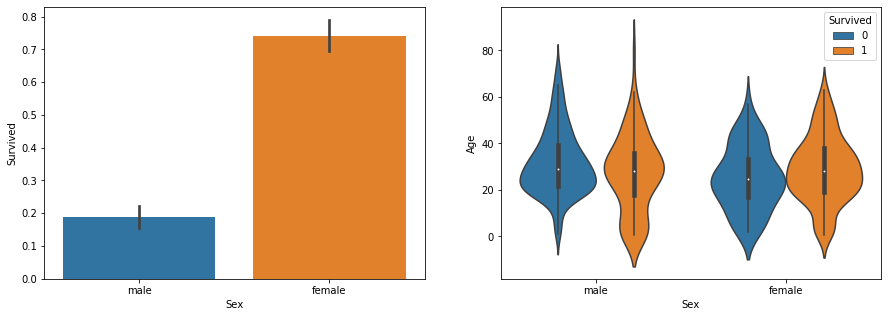

In [156]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(df.Sex, df.Survived)
plt.subplot(1,2,2)
sns.violinplot(df.Sex, df.Age, hue=df.Survived)

# Performing Machine Learning

* Converting Data Frame into labels and target.
* Performing traintest split.

In [360]:
X = df.loc[:, ['Age', 'Pclass', 'Sex', 'SibSp', 'Parch', 'C', 'Q', 'S']]
y = df.loc[:, 'Survived']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=33)


#### Comparing different models
Models that are compared -
* Logistic Regression
* LDA
* KNN
* Decision Tree
* GaussianNB
* SVM
* Random Forest

/home/ubuntu/anaconda3/envs/Own/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ubuntu/anaconda3/envs/Own/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ubuntu/anaconda3/envs/Own/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ubuntu/anaconda3/envs/Own/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ubuntu/anaconda3/envs/Own/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarn

LR: 0.794882 (0.064596)
LDA: 0.784343 (0.065798)
KNN: 0.782896 (0.068186)
DTC: 0.799226 (0.064425)
NB: 0.752929 (0.061847)


/home/ubuntu/anaconda3/envs/Own/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ubuntu/anaconda3/envs/Own/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ubuntu/anaconda3/envs/Own/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ubuntu/anaconda3/envs/

SVM: 0.805118 (0.046748)


/home/ubuntu/anaconda3/envs/Own/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/envs/Own/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/envs/Own/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RFC: 0.782828 (0.053455)


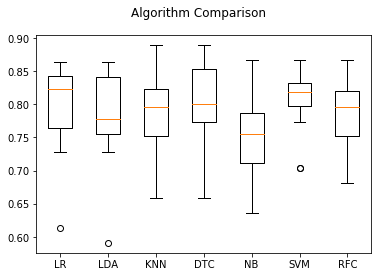

In [394]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(("RFC", RandomForestClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=15, random_state=7)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Performing Grid Search Cross Validation

In [391]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=100)
grid_search.fit(X, y)
print("Score --> ", grid_search.best_score_, " Best Parametesr --> ", grid_search.best_params_)

Score -->  0.8305274971941639  Best Parametesr -->  {'C': 10, 'gamma': 0.01}


/home/ubuntu/anaconda3/envs/Own/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Using the result from grid search for firring and scoring SVM model.

In [393]:
svm = SVC(C = 10, gamma = 0.01)
svm.fit(X_train, y_train)
print(accuracy_score(y_test, svm.predict(X_test)))
print(classification_report(y_test, svm.predict(X_test)))

0.8699551569506726
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       134
           1       0.85      0.82      0.83        89

    accuracy                           0.87       223
   macro avg       0.87      0.86      0.86       223
weighted avg       0.87      0.87      0.87       223

